In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

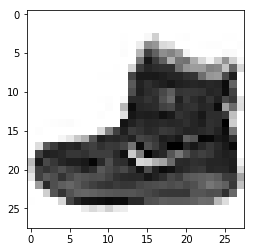

In [6]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [9]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

In [10]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



0 [D loss: 0.724758, acc.: 39.06%] [G loss: 0.645711]


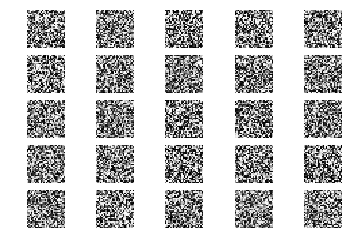

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.473591, acc.: 67.19%] [G loss: 0.648434]
2 [D loss: 0.433168, acc.: 70.31%] [G loss: 0.819577]
3 [D loss: 0.347957, acc.: 81.25%] [G loss: 0.985521]
4 [D loss: 0.262909, acc.: 95.31%] [G loss: 1.067906]
5 [D loss: 0.259007, acc.: 95.31%] [G loss: 1.254123]
6 [D loss: 0.216996, acc.: 98.44%] [G loss: 1.405262]
7 [D loss: 0.177858, acc.: 96.88%] [G loss: 1.459457]
8 [D loss: 0.150284, acc.: 100.00%] [G loss: 1.543193]
9 [D loss: 0.136116, acc.: 100.00%] [G loss: 1.591837]
10 [D loss: 0.144427, acc.: 100.00%] [G loss: 1.650008]
11 [D loss: 0.121494, acc.: 100.00%] [G loss: 1.858823]
12 [D loss: 0.118778, acc.: 100.00%] [G loss: 1.923549]
13 [D loss: 0.106141, acc.: 100.00%] [G loss: 2.023390]
14 [D loss: 0.101261, acc.: 100.00%] [G loss: 2.096440]
15 [D loss: 0.081157, acc.: 100.00%] [G loss: 2.178489]
16 [D loss: 0.082982, acc.: 100.00%] [G loss: 2.252811]
17 [D loss: 0.095522, acc.: 98.44%] [G loss: 2.268998]
18 [D loss: 0.068711, acc.: 100.00%] [G loss: 2.330004]
19 [D los

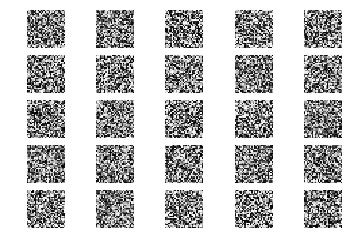

51 [D loss: 0.024859, acc.: 100.00%] [G loss: 3.638591]
52 [D loss: 0.025982, acc.: 100.00%] [G loss: 3.540371]
53 [D loss: 0.020315, acc.: 100.00%] [G loss: 3.676860]
54 [D loss: 0.023946, acc.: 100.00%] [G loss: 3.719275]
55 [D loss: 0.023238, acc.: 100.00%] [G loss: 3.770365]
56 [D loss: 0.051546, acc.: 98.44%] [G loss: 3.796025]
57 [D loss: 0.024533, acc.: 100.00%] [G loss: 3.761427]
58 [D loss: 0.026306, acc.: 100.00%] [G loss: 3.900685]
59 [D loss: 0.019411, acc.: 100.00%] [G loss: 3.769352]
60 [D loss: 0.015668, acc.: 100.00%] [G loss: 3.768455]
61 [D loss: 0.021970, acc.: 100.00%] [G loss: 3.762416]
62 [D loss: 0.020942, acc.: 100.00%] [G loss: 3.865088]
63 [D loss: 0.019287, acc.: 100.00%] [G loss: 3.793427]
64 [D loss: 0.017226, acc.: 100.00%] [G loss: 3.994556]
65 [D loss: 0.018249, acc.: 100.00%] [G loss: 3.927303]
66 [D loss: 0.020475, acc.: 100.00%] [G loss: 3.956160]
67 [D loss: 0.016137, acc.: 100.00%] [G loss: 3.932539]
68 [D loss: 0.027231, acc.: 100.00%] [G loss: 4.0

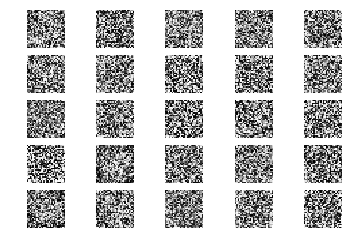

101 [D loss: 0.019464, acc.: 100.00%] [G loss: 4.434220]
102 [D loss: 0.012790, acc.: 100.00%] [G loss: 4.532615]
103 [D loss: 0.014172, acc.: 100.00%] [G loss: 4.571630]
104 [D loss: 0.068180, acc.: 98.44%] [G loss: 4.178063]
105 [D loss: 0.022099, acc.: 100.00%] [G loss: 4.329258]
106 [D loss: 0.014355, acc.: 100.00%] [G loss: 4.525500]
107 [D loss: 0.017813, acc.: 100.00%] [G loss: 4.315613]
108 [D loss: 0.023349, acc.: 100.00%] [G loss: 4.578573]
109 [D loss: 0.017695, acc.: 100.00%] [G loss: 4.503898]
110 [D loss: 0.017976, acc.: 100.00%] [G loss: 4.627443]
111 [D loss: 0.027055, acc.: 100.00%] [G loss: 4.544010]
112 [D loss: 0.016892, acc.: 100.00%] [G loss: 4.478158]
113 [D loss: 0.018412, acc.: 100.00%] [G loss: 4.609901]
114 [D loss: 0.016608, acc.: 100.00%] [G loss: 4.744007]
115 [D loss: 0.019136, acc.: 100.00%] [G loss: 4.575703]
116 [D loss: 0.016244, acc.: 100.00%] [G loss: 4.481141]
117 [D loss: 0.023623, acc.: 100.00%] [G loss: 4.554233]
118 [D loss: 0.021150, acc.: 100

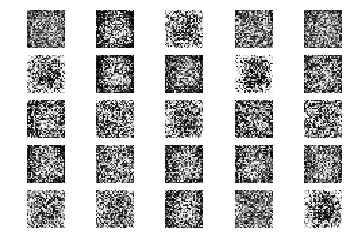

151 [D loss: 0.040180, acc.: 100.00%] [G loss: 4.951404]
152 [D loss: 0.056262, acc.: 100.00%] [G loss: 5.036494]
153 [D loss: 0.043933, acc.: 100.00%] [G loss: 4.950993]
154 [D loss: 0.086540, acc.: 95.31%] [G loss: 4.787796]
155 [D loss: 0.194609, acc.: 92.19%] [G loss: 4.725348]
156 [D loss: 0.049878, acc.: 98.44%] [G loss: 4.459296]
157 [D loss: 0.093765, acc.: 93.75%] [G loss: 4.830387]
158 [D loss: 0.103179, acc.: 98.44%] [G loss: 4.498651]
159 [D loss: 0.120268, acc.: 93.75%] [G loss: 4.498554]
160 [D loss: 0.043591, acc.: 100.00%] [G loss: 4.503046]
161 [D loss: 0.109004, acc.: 96.88%] [G loss: 4.199394]
162 [D loss: 0.072073, acc.: 98.44%] [G loss: 4.679436]
163 [D loss: 0.209390, acc.: 93.75%] [G loss: 4.502215]
164 [D loss: 0.093516, acc.: 96.88%] [G loss: 4.885884]
165 [D loss: 0.166046, acc.: 95.31%] [G loss: 4.762193]
166 [D loss: 0.038542, acc.: 98.44%] [G loss: 4.728346]
167 [D loss: 0.091710, acc.: 95.31%] [G loss: 4.679072]
168 [D loss: 0.076007, acc.: 98.44%] [G loss

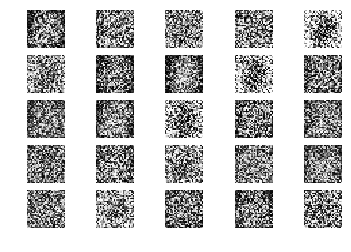

201 [D loss: 0.253208, acc.: 90.62%] [G loss: 3.709288]
202 [D loss: 0.140891, acc.: 93.75%] [G loss: 4.313699]
203 [D loss: 0.093519, acc.: 98.44%] [G loss: 4.602199]
204 [D loss: 0.204103, acc.: 96.88%] [G loss: 3.601405]
205 [D loss: 0.135684, acc.: 93.75%] [G loss: 4.389233]
206 [D loss: 0.225637, acc.: 90.62%] [G loss: 3.650697]
207 [D loss: 0.038304, acc.: 100.00%] [G loss: 3.364934]
208 [D loss: 0.111676, acc.: 96.88%] [G loss: 4.029154]
209 [D loss: 0.113695, acc.: 96.88%] [G loss: 4.219234]
210 [D loss: 0.183551, acc.: 95.31%] [G loss: 3.928923]
211 [D loss: 0.234748, acc.: 95.31%] [G loss: 3.976910]
212 [D loss: 0.121692, acc.: 95.31%] [G loss: 4.080223]
213 [D loss: 0.107267, acc.: 95.31%] [G loss: 4.682189]
214 [D loss: 0.077742, acc.: 98.44%] [G loss: 4.595004]
215 [D loss: 0.226237, acc.: 90.62%] [G loss: 4.009237]
216 [D loss: 0.203161, acc.: 92.19%] [G loss: 4.256433]
217 [D loss: 0.200048, acc.: 90.62%] [G loss: 4.127843]
218 [D loss: 0.201894, acc.: 93.75%] [G loss: 3

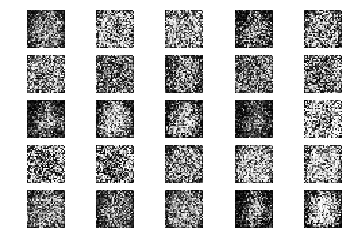

251 [D loss: 0.252105, acc.: 90.62%] [G loss: 4.147256]
252 [D loss: 0.438388, acc.: 82.81%] [G loss: 3.334134]
253 [D loss: 0.130375, acc.: 95.31%] [G loss: 4.004156]
254 [D loss: 0.242236, acc.: 89.06%] [G loss: 3.567711]
255 [D loss: 0.098523, acc.: 100.00%] [G loss: 4.200234]
256 [D loss: 0.209813, acc.: 93.75%] [G loss: 4.083035]
257 [D loss: 0.659404, acc.: 70.31%] [G loss: 3.930475]
258 [D loss: 0.141467, acc.: 95.31%] [G loss: 4.230151]
259 [D loss: 0.295136, acc.: 87.50%] [G loss: 3.388141]
260 [D loss: 0.247839, acc.: 93.75%] [G loss: 3.048842]
261 [D loss: 0.162501, acc.: 95.31%] [G loss: 3.704799]
262 [D loss: 0.089566, acc.: 98.44%] [G loss: 4.224181]
263 [D loss: 0.248466, acc.: 93.75%] [G loss: 4.019157]
264 [D loss: 0.163798, acc.: 96.88%] [G loss: 3.676891]
265 [D loss: 0.117568, acc.: 100.00%] [G loss: 3.973141]
266 [D loss: 0.143665, acc.: 96.88%] [G loss: 4.276245]
267 [D loss: 0.153934, acc.: 95.31%] [G loss: 4.425164]
268 [D loss: 0.319830, acc.: 87.50%] [G loss: 

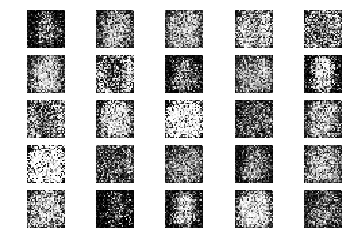

301 [D loss: 0.102253, acc.: 95.31%] [G loss: 4.206176]
302 [D loss: 0.356188, acc.: 87.50%] [G loss: 3.182387]
303 [D loss: 0.213267, acc.: 95.31%] [G loss: 3.627732]
304 [D loss: 0.445443, acc.: 81.25%] [G loss: 2.984788]
305 [D loss: 0.200442, acc.: 89.06%] [G loss: 3.866889]
306 [D loss: 0.184465, acc.: 92.19%] [G loss: 4.033341]
307 [D loss: 0.141180, acc.: 96.88%] [G loss: 4.138606]
308 [D loss: 0.190426, acc.: 95.31%] [G loss: 3.725137]
309 [D loss: 0.147208, acc.: 95.31%] [G loss: 4.806652]
310 [D loss: 0.313043, acc.: 93.75%] [G loss: 3.328961]
311 [D loss: 0.181012, acc.: 92.19%] [G loss: 3.631038]
312 [D loss: 0.397745, acc.: 85.94%] [G loss: 3.269558]
313 [D loss: 0.146817, acc.: 95.31%] [G loss: 3.447138]
314 [D loss: 0.111794, acc.: 98.44%] [G loss: 3.706329]
315 [D loss: 0.213098, acc.: 89.06%] [G loss: 3.818808]
316 [D loss: 0.183092, acc.: 96.88%] [G loss: 4.524076]
317 [D loss: 0.577183, acc.: 71.88%] [G loss: 3.074131]
318 [D loss: 0.243836, acc.: 92.19%] [G loss: 3.

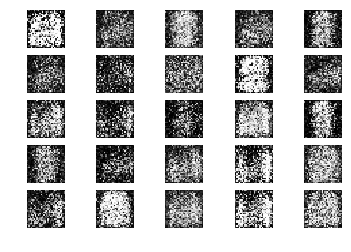

351 [D loss: 0.208558, acc.: 92.19%] [G loss: 3.068208]
352 [D loss: 0.716917, acc.: 68.75%] [G loss: 3.156285]
353 [D loss: 0.249065, acc.: 92.19%] [G loss: 3.946932]
354 [D loss: 0.777180, acc.: 68.75%] [G loss: 3.220894]
355 [D loss: 0.347289, acc.: 89.06%] [G loss: 3.719297]
356 [D loss: 0.474654, acc.: 78.12%] [G loss: 3.049041]
357 [D loss: 0.348206, acc.: 92.19%] [G loss: 3.409281]
358 [D loss: 0.318361, acc.: 87.50%] [G loss: 3.792758]
359 [D loss: 0.564779, acc.: 75.00%] [G loss: 2.890661]
360 [D loss: 0.391365, acc.: 85.94%] [G loss: 2.983667]
361 [D loss: 0.298584, acc.: 89.06%] [G loss: 3.210195]
362 [D loss: 0.297301, acc.: 84.38%] [G loss: 3.760821]
363 [D loss: 0.695418, acc.: 68.75%] [G loss: 2.301312]
364 [D loss: 0.339478, acc.: 90.62%] [G loss: 2.803140]
365 [D loss: 0.231756, acc.: 93.75%] [G loss: 3.333830]
366 [D loss: 0.251332, acc.: 92.19%] [G loss: 2.736780]
367 [D loss: 0.438532, acc.: 81.25%] [G loss: 3.236090]
368 [D loss: 0.619339, acc.: 81.25%] [G loss: 2.

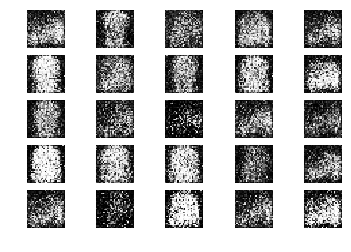

401 [D loss: 0.987010, acc.: 53.12%] [G loss: 1.630652]
402 [D loss: 0.596679, acc.: 71.88%] [G loss: 2.194921]
403 [D loss: 0.575355, acc.: 90.62%] [G loss: 2.712277]
404 [D loss: 0.875415, acc.: 60.94%] [G loss: 1.775311]
405 [D loss: 0.663793, acc.: 70.31%] [G loss: 1.889659]
406 [D loss: 0.699517, acc.: 67.19%] [G loss: 2.013400]
407 [D loss: 0.754002, acc.: 67.19%] [G loss: 1.811788]
408 [D loss: 0.543824, acc.: 65.62%] [G loss: 1.951299]
409 [D loss: 0.881802, acc.: 57.81%] [G loss: 1.742311]
410 [D loss: 0.543063, acc.: 73.44%] [G loss: 1.884413]
411 [D loss: 0.558440, acc.: 71.88%] [G loss: 1.640784]
412 [D loss: 0.710670, acc.: 64.06%] [G loss: 1.720389]
413 [D loss: 0.510781, acc.: 73.44%] [G loss: 1.921225]
414 [D loss: 0.739307, acc.: 54.69%] [G loss: 1.589086]
415 [D loss: 0.675562, acc.: 67.19%] [G loss: 2.124721]
416 [D loss: 0.622836, acc.: 71.88%] [G loss: 1.694034]
417 [D loss: 0.832890, acc.: 54.69%] [G loss: 1.796955]
418 [D loss: 0.607441, acc.: 65.62%] [G loss: 1.

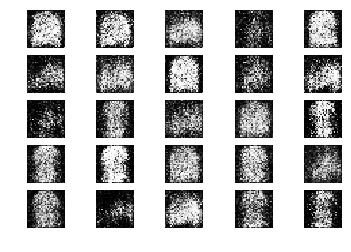

451 [D loss: 0.639866, acc.: 60.94%] [G loss: 1.454713]
452 [D loss: 0.793652, acc.: 48.44%] [G loss: 1.169822]
453 [D loss: 0.651832, acc.: 64.06%] [G loss: 1.497700]
454 [D loss: 0.710928, acc.: 57.81%] [G loss: 1.375909]
455 [D loss: 0.547173, acc.: 75.00%] [G loss: 1.456147]
456 [D loss: 0.673515, acc.: 62.50%] [G loss: 1.369919]
457 [D loss: 0.591103, acc.: 64.06%] [G loss: 1.341499]
458 [D loss: 0.598844, acc.: 70.31%] [G loss: 1.519993]
459 [D loss: 0.739830, acc.: 67.19%] [G loss: 1.232723]
460 [D loss: 0.681303, acc.: 54.69%] [G loss: 1.197490]
461 [D loss: 0.703100, acc.: 60.94%] [G loss: 1.268842]
462 [D loss: 0.647045, acc.: 68.75%] [G loss: 1.205044]
463 [D loss: 0.762773, acc.: 48.44%] [G loss: 1.177123]
464 [D loss: 0.564395, acc.: 71.88%] [G loss: 1.182733]
465 [D loss: 0.563443, acc.: 65.62%] [G loss: 1.391176]
466 [D loss: 0.718551, acc.: 59.38%] [G loss: 1.275609]
467 [D loss: 0.538843, acc.: 82.81%] [G loss: 1.253522]
468 [D loss: 0.663287, acc.: 64.06%] [G loss: 1.

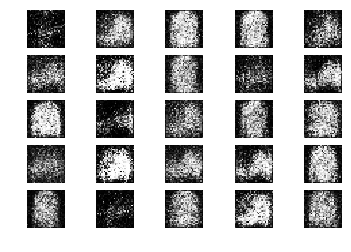

501 [D loss: 0.658107, acc.: 70.31%] [G loss: 1.184915]
502 [D loss: 0.632696, acc.: 71.88%] [G loss: 1.218122]
503 [D loss: 0.717899, acc.: 59.38%] [G loss: 1.021429]
504 [D loss: 0.731963, acc.: 56.25%] [G loss: 1.174301]
505 [D loss: 0.533745, acc.: 79.69%] [G loss: 1.229253]
506 [D loss: 0.686116, acc.: 64.06%] [G loss: 1.183860]
507 [D loss: 0.687954, acc.: 60.94%] [G loss: 1.154497]
508 [D loss: 0.504707, acc.: 82.81%] [G loss: 1.146824]
509 [D loss: 0.629711, acc.: 73.44%] [G loss: 1.115490]
510 [D loss: 0.577245, acc.: 71.88%] [G loss: 1.004954]
511 [D loss: 0.563391, acc.: 68.75%] [G loss: 1.132404]
512 [D loss: 0.590718, acc.: 75.00%] [G loss: 1.136318]
513 [D loss: 0.671813, acc.: 60.94%] [G loss: 1.159173]
514 [D loss: 0.707605, acc.: 56.25%] [G loss: 1.157023]
515 [D loss: 0.487680, acc.: 71.88%] [G loss: 1.253631]
516 [D loss: 0.732534, acc.: 54.69%] [G loss: 1.190588]
517 [D loss: 0.597009, acc.: 62.50%] [G loss: 1.213180]
518 [D loss: 0.617604, acc.: 68.75%] [G loss: 1.

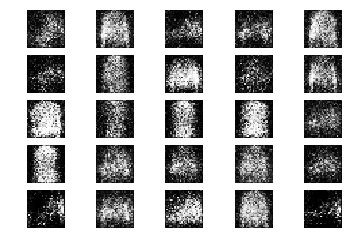

551 [D loss: 0.606572, acc.: 71.88%] [G loss: 1.195316]
552 [D loss: 0.697603, acc.: 68.75%] [G loss: 0.947773]
553 [D loss: 0.677210, acc.: 64.06%] [G loss: 0.907935]
554 [D loss: 0.585579, acc.: 70.31%] [G loss: 1.057974]
555 [D loss: 0.709296, acc.: 64.06%] [G loss: 1.004753]
556 [D loss: 0.654994, acc.: 62.50%] [G loss: 0.943826]
557 [D loss: 0.582169, acc.: 75.00%] [G loss: 0.993383]
558 [D loss: 0.711099, acc.: 56.25%] [G loss: 1.082010]
559 [D loss: 0.591660, acc.: 70.31%] [G loss: 1.086956]
560 [D loss: 0.627240, acc.: 60.94%] [G loss: 1.011663]
561 [D loss: 0.680835, acc.: 53.12%] [G loss: 0.921741]
562 [D loss: 0.712961, acc.: 64.06%] [G loss: 1.068311]
563 [D loss: 0.651718, acc.: 65.62%] [G loss: 0.932828]
564 [D loss: 0.541553, acc.: 75.00%] [G loss: 1.004704]
565 [D loss: 0.688755, acc.: 62.50%] [G loss: 0.943926]
566 [D loss: 0.596846, acc.: 70.31%] [G loss: 0.951580]
567 [D loss: 0.645469, acc.: 60.94%] [G loss: 0.960121]
568 [D loss: 0.554086, acc.: 79.69%] [G loss: 0.

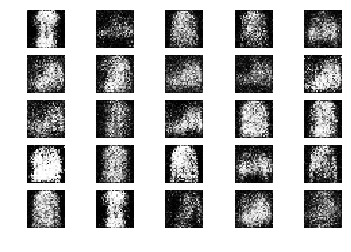

601 [D loss: 0.490202, acc.: 82.81%] [G loss: 1.097880]
602 [D loss: 0.663667, acc.: 54.69%] [G loss: 1.035195]
603 [D loss: 0.601015, acc.: 71.88%] [G loss: 1.107644]
604 [D loss: 0.691963, acc.: 56.25%] [G loss: 1.110471]
605 [D loss: 0.640811, acc.: 60.94%] [G loss: 1.063191]
606 [D loss: 0.569504, acc.: 70.31%] [G loss: 0.997877]
607 [D loss: 0.616640, acc.: 53.12%] [G loss: 1.103575]
608 [D loss: 0.607682, acc.: 71.88%] [G loss: 1.041931]
609 [D loss: 0.561557, acc.: 67.19%] [G loss: 1.062930]
610 [D loss: 0.554925, acc.: 75.00%] [G loss: 1.083068]
611 [D loss: 0.592427, acc.: 68.75%] [G loss: 1.016003]
612 [D loss: 0.616762, acc.: 70.31%] [G loss: 1.108924]
613 [D loss: 0.545001, acc.: 71.88%] [G loss: 1.093932]
614 [D loss: 0.645863, acc.: 62.50%] [G loss: 1.054317]
615 [D loss: 0.446842, acc.: 78.12%] [G loss: 1.128187]
616 [D loss: 0.578013, acc.: 68.75%] [G loss: 1.076921]
617 [D loss: 0.564769, acc.: 71.88%] [G loss: 1.089897]
618 [D loss: 0.534266, acc.: 76.56%] [G loss: 1.

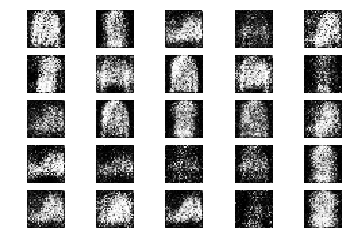

651 [D loss: 0.597403, acc.: 71.88%] [G loss: 0.945921]
652 [D loss: 0.593957, acc.: 71.88%] [G loss: 1.110942]
653 [D loss: 0.584916, acc.: 70.31%] [G loss: 1.080020]
654 [D loss: 0.527895, acc.: 75.00%] [G loss: 1.135928]
655 [D loss: 0.543264, acc.: 75.00%] [G loss: 1.067759]
656 [D loss: 0.548362, acc.: 76.56%] [G loss: 1.111556]
657 [D loss: 0.584126, acc.: 68.75%] [G loss: 1.018911]
658 [D loss: 0.570409, acc.: 70.31%] [G loss: 1.099650]
659 [D loss: 0.488297, acc.: 76.56%] [G loss: 1.296005]
660 [D loss: 0.504286, acc.: 78.12%] [G loss: 1.266597]
661 [D loss: 0.563223, acc.: 75.00%] [G loss: 1.288066]
662 [D loss: 0.551000, acc.: 84.38%] [G loss: 1.092912]
663 [D loss: 0.526826, acc.: 75.00%] [G loss: 1.127293]
664 [D loss: 0.592659, acc.: 67.19%] [G loss: 1.108949]
665 [D loss: 0.488908, acc.: 81.25%] [G loss: 1.197827]
666 [D loss: 0.584151, acc.: 70.31%] [G loss: 1.255086]
667 [D loss: 0.634608, acc.: 65.62%] [G loss: 1.154787]
668 [D loss: 0.524112, acc.: 78.12%] [G loss: 1.

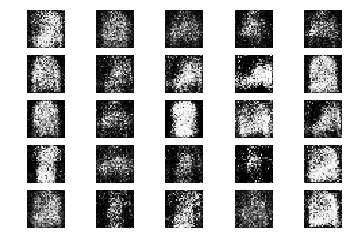

701 [D loss: 0.575037, acc.: 65.62%] [G loss: 1.289469]
702 [D loss: 0.623151, acc.: 64.06%] [G loss: 1.349690]
703 [D loss: 0.589806, acc.: 68.75%] [G loss: 1.185830]
704 [D loss: 0.614268, acc.: 67.19%] [G loss: 1.112299]
705 [D loss: 0.661844, acc.: 60.94%] [G loss: 0.939245]
706 [D loss: 0.637423, acc.: 62.50%] [G loss: 0.963297]
707 [D loss: 0.584388, acc.: 64.06%] [G loss: 1.067755]
708 [D loss: 0.511459, acc.: 73.44%] [G loss: 1.136578]
709 [D loss: 0.617612, acc.: 68.75%] [G loss: 1.190315]
710 [D loss: 0.574349, acc.: 75.00%] [G loss: 1.034713]
711 [D loss: 0.590192, acc.: 59.38%] [G loss: 1.095366]
712 [D loss: 0.570821, acc.: 71.88%] [G loss: 1.153633]
713 [D loss: 0.642991, acc.: 62.50%] [G loss: 1.052347]
714 [D loss: 0.550665, acc.: 73.44%] [G loss: 1.192502]
715 [D loss: 0.563363, acc.: 76.56%] [G loss: 1.071304]
716 [D loss: 0.565129, acc.: 70.31%] [G loss: 1.231094]
717 [D loss: 0.562067, acc.: 73.44%] [G loss: 1.192187]
718 [D loss: 0.564908, acc.: 64.06%] [G loss: 1.

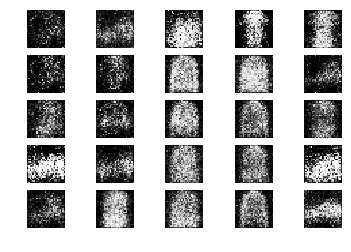

751 [D loss: 0.552863, acc.: 71.88%] [G loss: 1.175191]
752 [D loss: 0.489618, acc.: 85.94%] [G loss: 1.141971]
753 [D loss: 0.510529, acc.: 78.12%] [G loss: 1.285648]
754 [D loss: 0.524133, acc.: 84.38%] [G loss: 1.293769]
755 [D loss: 0.538721, acc.: 71.88%] [G loss: 1.235525]
756 [D loss: 0.486995, acc.: 87.50%] [G loss: 1.084625]
757 [D loss: 0.503197, acc.: 82.81%] [G loss: 1.103057]
758 [D loss: 0.543112, acc.: 67.19%] [G loss: 1.258432]
759 [D loss: 0.523138, acc.: 82.81%] [G loss: 1.236502]
760 [D loss: 0.546213, acc.: 78.12%] [G loss: 1.239213]
761 [D loss: 0.633895, acc.: 68.75%] [G loss: 1.115957]
762 [D loss: 0.597357, acc.: 71.88%] [G loss: 1.244028]
763 [D loss: 0.702112, acc.: 60.94%] [G loss: 1.285827]
764 [D loss: 0.511616, acc.: 84.38%] [G loss: 1.246653]
765 [D loss: 0.557974, acc.: 79.69%] [G loss: 1.139305]
766 [D loss: 0.514770, acc.: 76.56%] [G loss: 1.208065]
767 [D loss: 0.597157, acc.: 70.31%] [G loss: 1.132456]
768 [D loss: 0.453435, acc.: 89.06%] [G loss: 1.

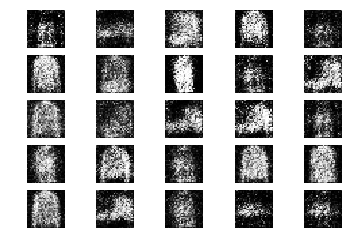

801 [D loss: 0.718375, acc.: 53.12%] [G loss: 1.219051]
802 [D loss: 0.702795, acc.: 57.81%] [G loss: 1.236964]
803 [D loss: 0.594433, acc.: 67.19%] [G loss: 1.205350]
804 [D loss: 0.573114, acc.: 71.88%] [G loss: 1.166787]
805 [D loss: 0.601518, acc.: 71.88%] [G loss: 1.082685]
806 [D loss: 0.592828, acc.: 70.31%] [G loss: 0.975330]
807 [D loss: 0.531038, acc.: 79.69%] [G loss: 1.001984]
808 [D loss: 0.505778, acc.: 76.56%] [G loss: 1.099811]
809 [D loss: 0.639318, acc.: 59.38%] [G loss: 1.153140]
810 [D loss: 0.555915, acc.: 71.88%] [G loss: 1.190464]
811 [D loss: 0.550326, acc.: 71.88%] [G loss: 1.216558]
812 [D loss: 0.568524, acc.: 70.31%] [G loss: 1.117211]
813 [D loss: 0.516624, acc.: 76.56%] [G loss: 1.239370]
814 [D loss: 0.509998, acc.: 76.56%] [G loss: 1.193661]
815 [D loss: 0.567617, acc.: 71.88%] [G loss: 1.095560]
816 [D loss: 0.504976, acc.: 78.12%] [G loss: 1.141754]
817 [D loss: 0.532076, acc.: 73.44%] [G loss: 1.186190]
818 [D loss: 0.512845, acc.: 76.56%] [G loss: 1.

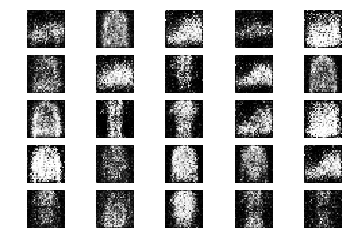

851 [D loss: 0.688230, acc.: 48.44%] [G loss: 1.106808]
852 [D loss: 0.581599, acc.: 78.12%] [G loss: 1.051371]
853 [D loss: 0.575145, acc.: 71.88%] [G loss: 1.185064]
854 [D loss: 0.729973, acc.: 68.75%] [G loss: 1.131106]
855 [D loss: 0.650698, acc.: 60.94%] [G loss: 1.006339]
856 [D loss: 0.596619, acc.: 64.06%] [G loss: 1.122418]
857 [D loss: 0.534698, acc.: 76.56%] [G loss: 1.147222]
858 [D loss: 0.602639, acc.: 68.75%] [G loss: 1.019274]
859 [D loss: 0.576146, acc.: 71.88%] [G loss: 0.999786]
860 [D loss: 0.619122, acc.: 65.62%] [G loss: 0.953405]
861 [D loss: 0.568755, acc.: 59.38%] [G loss: 0.968373]
862 [D loss: 0.622706, acc.: 67.19%] [G loss: 1.078271]
863 [D loss: 0.530752, acc.: 75.00%] [G loss: 1.135400]
864 [D loss: 0.623688, acc.: 65.62%] [G loss: 0.960549]
865 [D loss: 0.664315, acc.: 64.06%] [G loss: 1.085055]
866 [D loss: 0.628370, acc.: 64.06%] [G loss: 1.113399]
867 [D loss: 0.575490, acc.: 73.44%] [G loss: 1.227384]
868 [D loss: 0.636745, acc.: 59.38%] [G loss: 1.

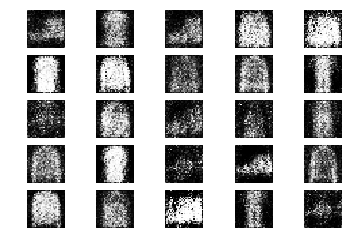

901 [D loss: 0.605249, acc.: 70.31%] [G loss: 1.052416]
902 [D loss: 0.609307, acc.: 65.62%] [G loss: 1.001804]
903 [D loss: 0.586898, acc.: 76.56%] [G loss: 0.941488]
904 [D loss: 0.651288, acc.: 67.19%] [G loss: 0.947186]
905 [D loss: 0.640889, acc.: 65.62%] [G loss: 0.987579]
906 [D loss: 0.662321, acc.: 62.50%] [G loss: 0.987232]
907 [D loss: 0.624708, acc.: 60.94%] [G loss: 1.027087]
908 [D loss: 0.578120, acc.: 70.31%] [G loss: 0.983186]
909 [D loss: 0.584876, acc.: 67.19%] [G loss: 0.981890]
910 [D loss: 0.610401, acc.: 67.19%] [G loss: 0.909688]
911 [D loss: 0.600380, acc.: 71.88%] [G loss: 1.035761]
912 [D loss: 0.593524, acc.: 78.12%] [G loss: 0.941424]
913 [D loss: 0.549608, acc.: 70.31%] [G loss: 1.082170]
914 [D loss: 0.613432, acc.: 64.06%] [G loss: 1.094306]
915 [D loss: 0.765634, acc.: 50.00%] [G loss: 0.959694]
916 [D loss: 0.578808, acc.: 70.31%] [G loss: 0.987677]
917 [D loss: 0.688787, acc.: 59.38%] [G loss: 0.996299]
918 [D loss: 0.666092, acc.: 67.19%] [G loss: 1.

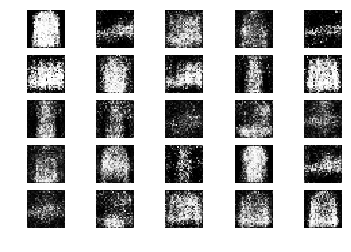

951 [D loss: 0.575169, acc.: 67.19%] [G loss: 0.917865]
952 [D loss: 0.648190, acc.: 60.94%] [G loss: 0.986837]
953 [D loss: 0.579919, acc.: 64.06%] [G loss: 1.028004]
954 [D loss: 0.553908, acc.: 70.31%] [G loss: 0.899602]
955 [D loss: 0.616254, acc.: 65.62%] [G loss: 0.924120]
956 [D loss: 0.660831, acc.: 57.81%] [G loss: 0.967694]
957 [D loss: 0.630630, acc.: 57.81%] [G loss: 0.913186]
958 [D loss: 0.596021, acc.: 64.06%] [G loss: 1.061087]
959 [D loss: 0.560908, acc.: 73.44%] [G loss: 1.058090]
960 [D loss: 0.521089, acc.: 81.25%] [G loss: 1.001601]
961 [D loss: 0.599082, acc.: 68.75%] [G loss: 0.879845]
962 [D loss: 0.617502, acc.: 60.94%] [G loss: 0.900110]
963 [D loss: 0.521131, acc.: 73.44%] [G loss: 0.921054]
964 [D loss: 0.489601, acc.: 85.94%] [G loss: 1.087618]
965 [D loss: 0.557158, acc.: 71.88%] [G loss: 1.024381]
966 [D loss: 0.600966, acc.: 70.31%] [G loss: 1.033887]
967 [D loss: 0.624332, acc.: 60.94%] [G loss: 1.152366]
968 [D loss: 0.598142, acc.: 71.88%] [G loss: 1.

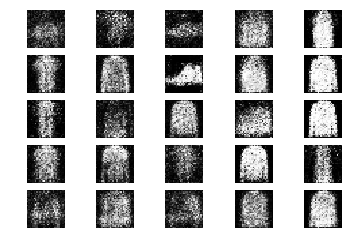

1001 [D loss: 0.611411, acc.: 71.88%] [G loss: 0.943319]
1002 [D loss: 0.552180, acc.: 67.19%] [G loss: 0.952920]
1003 [D loss: 0.678531, acc.: 54.69%] [G loss: 0.941452]
1004 [D loss: 0.568243, acc.: 68.75%] [G loss: 1.015111]
1005 [D loss: 0.565474, acc.: 75.00%] [G loss: 0.987931]
1006 [D loss: 0.713664, acc.: 64.06%] [G loss: 0.919927]
1007 [D loss: 0.611742, acc.: 75.00%] [G loss: 0.842753]
1008 [D loss: 0.613344, acc.: 70.31%] [G loss: 0.921972]
1009 [D loss: 0.590798, acc.: 68.75%] [G loss: 0.960744]
1010 [D loss: 0.642743, acc.: 59.38%] [G loss: 0.912974]
1011 [D loss: 0.456728, acc.: 84.38%] [G loss: 0.968792]
1012 [D loss: 0.618880, acc.: 64.06%] [G loss: 1.079805]
1013 [D loss: 0.648483, acc.: 68.75%] [G loss: 0.996061]
1014 [D loss: 0.696358, acc.: 62.50%] [G loss: 1.018342]
1015 [D loss: 0.659030, acc.: 64.06%] [G loss: 1.072490]
1016 [D loss: 0.677451, acc.: 59.38%] [G loss: 1.040309]
1017 [D loss: 0.608897, acc.: 73.44%] [G loss: 0.973715]
1018 [D loss: 0.678091, acc.: 5

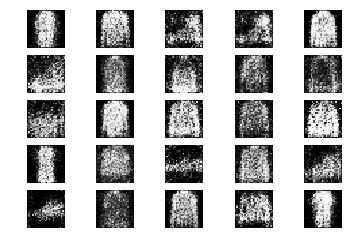

1051 [D loss: 0.615593, acc.: 64.06%] [G loss: 1.128299]
1052 [D loss: 0.614215, acc.: 67.19%] [G loss: 1.043967]
1053 [D loss: 0.598022, acc.: 68.75%] [G loss: 1.033552]
1054 [D loss: 0.666153, acc.: 65.62%] [G loss: 1.139313]
1055 [D loss: 0.544875, acc.: 76.56%] [G loss: 0.936836]
1056 [D loss: 0.624969, acc.: 59.38%] [G loss: 0.881191]
1057 [D loss: 0.602534, acc.: 60.94%] [G loss: 0.919654]
1058 [D loss: 0.576269, acc.: 71.88%] [G loss: 0.852391]
1059 [D loss: 0.616516, acc.: 59.38%] [G loss: 0.984790]
1060 [D loss: 0.584159, acc.: 70.31%] [G loss: 0.883375]
1061 [D loss: 0.657059, acc.: 60.94%] [G loss: 0.877274]
1062 [D loss: 0.624541, acc.: 68.75%] [G loss: 0.852731]
1063 [D loss: 0.629270, acc.: 68.75%] [G loss: 0.971903]
1064 [D loss: 0.616508, acc.: 68.75%] [G loss: 0.985938]
1065 [D loss: 0.666801, acc.: 60.94%] [G loss: 0.898021]
1066 [D loss: 0.620538, acc.: 65.62%] [G loss: 1.038033]
1067 [D loss: 0.617462, acc.: 65.62%] [G loss: 0.937854]
1068 [D loss: 0.591372, acc.: 6

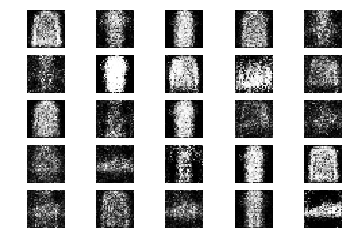

1101 [D loss: 0.580108, acc.: 65.62%] [G loss: 0.956065]
1102 [D loss: 0.607827, acc.: 67.19%] [G loss: 0.911175]
1103 [D loss: 0.677477, acc.: 59.38%] [G loss: 0.875346]
1104 [D loss: 0.591221, acc.: 76.56%] [G loss: 0.991003]
1105 [D loss: 0.599190, acc.: 64.06%] [G loss: 0.985437]
1106 [D loss: 0.543686, acc.: 76.56%] [G loss: 0.965547]
1107 [D loss: 0.561665, acc.: 73.44%] [G loss: 0.916456]
1108 [D loss: 0.618244, acc.: 62.50%] [G loss: 0.812208]
1109 [D loss: 0.545160, acc.: 76.56%] [G loss: 1.040923]
1110 [D loss: 0.565388, acc.: 73.44%] [G loss: 1.056375]
1111 [D loss: 0.627568, acc.: 62.50%] [G loss: 0.933547]
1112 [D loss: 0.559497, acc.: 71.88%] [G loss: 0.988640]
1113 [D loss: 0.576417, acc.: 68.75%] [G loss: 1.074513]
1114 [D loss: 0.614934, acc.: 62.50%] [G loss: 0.921725]
1115 [D loss: 0.646970, acc.: 57.81%] [G loss: 1.016263]
1116 [D loss: 0.584902, acc.: 75.00%] [G loss: 0.945793]
1117 [D loss: 0.720409, acc.: 51.56%] [G loss: 1.003610]
1118 [D loss: 0.698395, acc.: 5

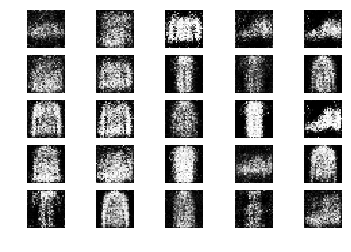

1151 [D loss: 0.687503, acc.: 46.88%] [G loss: 0.842789]
1152 [D loss: 0.611548, acc.: 65.62%] [G loss: 0.909954]
1153 [D loss: 0.578170, acc.: 71.88%] [G loss: 0.867960]
1154 [D loss: 0.675136, acc.: 64.06%] [G loss: 0.902076]
1155 [D loss: 0.611660, acc.: 71.88%] [G loss: 0.960732]
1156 [D loss: 0.663100, acc.: 57.81%] [G loss: 0.926377]
1157 [D loss: 0.586353, acc.: 76.56%] [G loss: 0.985777]
1158 [D loss: 0.586224, acc.: 73.44%] [G loss: 1.000131]
1159 [D loss: 0.625469, acc.: 60.94%] [G loss: 0.862071]
1160 [D loss: 0.560906, acc.: 76.56%] [G loss: 0.911923]
1161 [D loss: 0.579979, acc.: 71.88%] [G loss: 0.920837]
1162 [D loss: 0.631659, acc.: 60.94%] [G loss: 0.842112]
1163 [D loss: 0.587166, acc.: 73.44%] [G loss: 0.858747]
1164 [D loss: 0.685861, acc.: 54.69%] [G loss: 0.903455]
1165 [D loss: 0.531423, acc.: 78.12%] [G loss: 0.997619]
1166 [D loss: 0.568736, acc.: 73.44%] [G loss: 0.946636]
1167 [D loss: 0.586035, acc.: 68.75%] [G loss: 0.963267]
1168 [D loss: 0.622151, acc.: 6

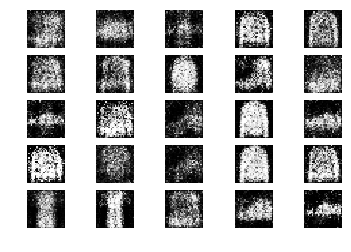

1201 [D loss: 0.652226, acc.: 57.81%] [G loss: 1.018048]
1202 [D loss: 0.579536, acc.: 70.31%] [G loss: 0.993496]
1203 [D loss: 0.599646, acc.: 64.06%] [G loss: 0.958934]
1204 [D loss: 0.566039, acc.: 68.75%] [G loss: 1.089914]
1205 [D loss: 0.533964, acc.: 76.56%] [G loss: 0.993674]
1206 [D loss: 0.599769, acc.: 68.75%] [G loss: 1.000937]
1207 [D loss: 0.614679, acc.: 62.50%] [G loss: 0.988861]
1208 [D loss: 0.647260, acc.: 64.06%] [G loss: 0.851567]
1209 [D loss: 0.638342, acc.: 60.94%] [G loss: 1.012379]
1210 [D loss: 0.614733, acc.: 73.44%] [G loss: 1.024927]
1211 [D loss: 0.601365, acc.: 68.75%] [G loss: 0.873353]
1212 [D loss: 0.543849, acc.: 79.69%] [G loss: 1.020167]
1213 [D loss: 0.550136, acc.: 67.19%] [G loss: 0.907784]
1214 [D loss: 0.556216, acc.: 73.44%] [G loss: 0.993575]
1215 [D loss: 0.626870, acc.: 68.75%] [G loss: 0.882425]
1216 [D loss: 0.566140, acc.: 71.88%] [G loss: 0.839429]
1217 [D loss: 0.630280, acc.: 62.50%] [G loss: 0.952322]
1218 [D loss: 0.700535, acc.: 5

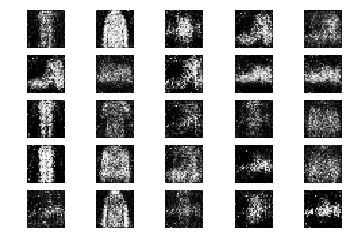

1251 [D loss: 0.550658, acc.: 82.81%] [G loss: 0.912196]
1252 [D loss: 0.625308, acc.: 75.00%] [G loss: 1.024002]
1253 [D loss: 0.578609, acc.: 67.19%] [G loss: 0.923335]
1254 [D loss: 0.576976, acc.: 70.31%] [G loss: 1.065203]
1255 [D loss: 0.633381, acc.: 65.62%] [G loss: 0.930799]
1256 [D loss: 0.587267, acc.: 67.19%] [G loss: 0.883639]
1257 [D loss: 0.641905, acc.: 64.06%] [G loss: 0.975195]
1258 [D loss: 0.605620, acc.: 65.62%] [G loss: 0.892641]
1259 [D loss: 0.627206, acc.: 73.44%] [G loss: 0.911036]
1260 [D loss: 0.571233, acc.: 65.62%] [G loss: 1.026409]
1261 [D loss: 0.628039, acc.: 65.62%] [G loss: 0.880763]
1262 [D loss: 0.615952, acc.: 62.50%] [G loss: 0.940858]
1263 [D loss: 0.660211, acc.: 56.25%] [G loss: 0.979653]
1264 [D loss: 0.591569, acc.: 65.62%] [G loss: 0.929122]
1265 [D loss: 0.583851, acc.: 73.44%] [G loss: 1.044765]
1266 [D loss: 0.602680, acc.: 65.62%] [G loss: 0.872775]
1267 [D loss: 0.642520, acc.: 65.62%] [G loss: 0.893023]
1268 [D loss: 0.670421, acc.: 5

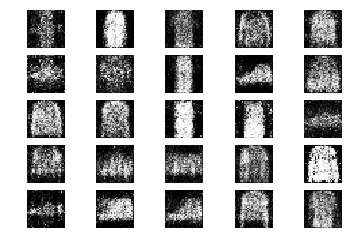

1301 [D loss: 0.612539, acc.: 64.06%] [G loss: 0.899521]
1302 [D loss: 0.646376, acc.: 56.25%] [G loss: 0.885065]
1303 [D loss: 0.628612, acc.: 62.50%] [G loss: 0.889908]
1304 [D loss: 0.630809, acc.: 65.62%] [G loss: 1.009336]
1305 [D loss: 0.705146, acc.: 54.69%] [G loss: 0.974274]
1306 [D loss: 0.676329, acc.: 59.38%] [G loss: 0.749938]
1307 [D loss: 0.557460, acc.: 75.00%] [G loss: 0.881209]
1308 [D loss: 0.662293, acc.: 54.69%] [G loss: 0.787696]
1309 [D loss: 0.587550, acc.: 62.50%] [G loss: 0.841313]
1310 [D loss: 0.598539, acc.: 68.75%] [G loss: 0.919738]
1311 [D loss: 0.601578, acc.: 65.62%] [G loss: 0.921546]
1312 [D loss: 0.563116, acc.: 73.44%] [G loss: 1.001644]
1313 [D loss: 0.603405, acc.: 68.75%] [G loss: 0.987604]
1314 [D loss: 0.599207, acc.: 64.06%] [G loss: 0.971904]
1315 [D loss: 0.619611, acc.: 67.19%] [G loss: 1.040971]
1316 [D loss: 0.624958, acc.: 68.75%] [G loss: 0.921981]
1317 [D loss: 0.662656, acc.: 56.25%] [G loss: 0.896865]
1318 [D loss: 0.666063, acc.: 6

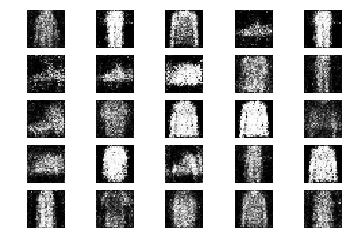

1351 [D loss: 0.653135, acc.: 62.50%] [G loss: 0.857804]
1352 [D loss: 0.597760, acc.: 71.88%] [G loss: 0.881849]
1353 [D loss: 0.637153, acc.: 60.94%] [G loss: 1.099151]
1354 [D loss: 0.610888, acc.: 65.62%] [G loss: 0.965558]
1355 [D loss: 0.591629, acc.: 67.19%] [G loss: 0.960709]
1356 [D loss: 0.674992, acc.: 51.56%] [G loss: 0.893534]
1357 [D loss: 0.541404, acc.: 71.88%] [G loss: 0.915874]
1358 [D loss: 0.609490, acc.: 65.62%] [G loss: 0.882928]
1359 [D loss: 0.629902, acc.: 60.94%] [G loss: 0.951566]
1360 [D loss: 0.587503, acc.: 67.19%] [G loss: 1.024927]
1361 [D loss: 0.630763, acc.: 70.31%] [G loss: 0.873793]
1362 [D loss: 0.564500, acc.: 73.44%] [G loss: 0.864298]
1363 [D loss: 0.624773, acc.: 64.06%] [G loss: 0.895600]
1364 [D loss: 0.581723, acc.: 71.88%] [G loss: 0.947724]
1365 [D loss: 0.598243, acc.: 70.31%] [G loss: 0.936881]
1366 [D loss: 0.605218, acc.: 65.62%] [G loss: 0.926512]
1367 [D loss: 0.579656, acc.: 75.00%] [G loss: 0.929017]
1368 [D loss: 0.629771, acc.: 6

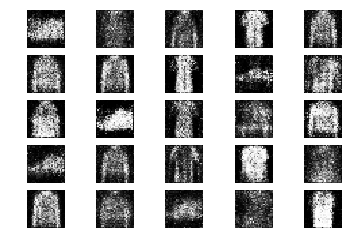

1401 [D loss: 0.622991, acc.: 64.06%] [G loss: 0.948186]
1402 [D loss: 0.728808, acc.: 46.88%] [G loss: 0.899329]
1403 [D loss: 0.624925, acc.: 64.06%] [G loss: 0.982036]
1404 [D loss: 0.681596, acc.: 59.38%] [G loss: 0.899417]
1405 [D loss: 0.591836, acc.: 70.31%] [G loss: 0.945698]
1406 [D loss: 0.672347, acc.: 54.69%] [G loss: 1.040420]
1407 [D loss: 0.569296, acc.: 73.44%] [G loss: 0.883715]
1408 [D loss: 0.621751, acc.: 59.38%] [G loss: 0.839177]
1409 [D loss: 0.619864, acc.: 65.62%] [G loss: 0.884727]
1410 [D loss: 0.646041, acc.: 59.38%] [G loss: 0.891082]
1411 [D loss: 0.594758, acc.: 62.50%] [G loss: 0.913488]
1412 [D loss: 0.599926, acc.: 70.31%] [G loss: 0.885515]
1413 [D loss: 0.651210, acc.: 64.06%] [G loss: 0.847180]
1414 [D loss: 0.611783, acc.: 67.19%] [G loss: 0.913669]
1415 [D loss: 0.536493, acc.: 73.44%] [G loss: 0.952583]
1416 [D loss: 0.636671, acc.: 64.06%] [G loss: 0.856543]
1417 [D loss: 0.664308, acc.: 64.06%] [G loss: 0.784463]
1418 [D loss: 0.651605, acc.: 6

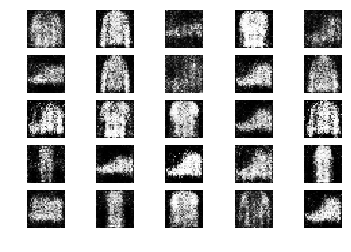

1451 [D loss: 0.592146, acc.: 70.31%] [G loss: 0.951904]
1452 [D loss: 0.632640, acc.: 62.50%] [G loss: 0.983267]
1453 [D loss: 0.654661, acc.: 67.19%] [G loss: 0.908846]
1454 [D loss: 0.595335, acc.: 70.31%] [G loss: 0.932054]
1455 [D loss: 0.670841, acc.: 59.38%] [G loss: 0.921629]
1456 [D loss: 0.659716, acc.: 64.06%] [G loss: 0.883246]
1457 [D loss: 0.657531, acc.: 70.31%] [G loss: 0.896773]
1458 [D loss: 0.647171, acc.: 67.19%] [G loss: 0.841693]
1459 [D loss: 0.609271, acc.: 65.62%] [G loss: 0.858311]
1460 [D loss: 0.630139, acc.: 62.50%] [G loss: 0.925710]
1461 [D loss: 0.644566, acc.: 62.50%] [G loss: 0.986697]
1462 [D loss: 0.628950, acc.: 60.94%] [G loss: 0.964382]
1463 [D loss: 0.580549, acc.: 71.88%] [G loss: 0.842355]
1464 [D loss: 0.707716, acc.: 53.12%] [G loss: 0.921659]
1465 [D loss: 0.625592, acc.: 70.31%] [G loss: 0.843642]
1466 [D loss: 0.632031, acc.: 65.62%] [G loss: 0.880864]
1467 [D loss: 0.666207, acc.: 62.50%] [G loss: 0.814754]
1468 [D loss: 0.565618, acc.: 7

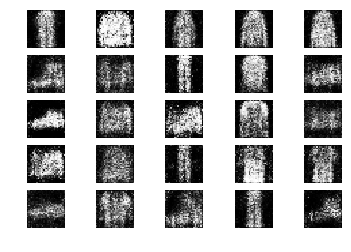

1501 [D loss: 0.625690, acc.: 64.06%] [G loss: 0.880849]
1502 [D loss: 0.585621, acc.: 65.62%] [G loss: 0.999130]
1503 [D loss: 0.604294, acc.: 67.19%] [G loss: 0.890804]
1504 [D loss: 0.675571, acc.: 56.25%] [G loss: 0.978694]
1505 [D loss: 0.601434, acc.: 67.19%] [G loss: 0.892243]
1506 [D loss: 0.637866, acc.: 64.06%] [G loss: 0.919044]
1507 [D loss: 0.696071, acc.: 51.56%] [G loss: 0.934644]
1508 [D loss: 0.679571, acc.: 51.56%] [G loss: 0.901425]
1509 [D loss: 0.615883, acc.: 60.94%] [G loss: 0.955219]
1510 [D loss: 0.621559, acc.: 71.88%] [G loss: 0.909944]
1511 [D loss: 0.700102, acc.: 51.56%] [G loss: 0.940055]
1512 [D loss: 0.621419, acc.: 64.06%] [G loss: 0.957367]
1513 [D loss: 0.662113, acc.: 60.94%] [G loss: 0.890085]
1514 [D loss: 0.567945, acc.: 71.88%] [G loss: 0.954196]
1515 [D loss: 0.564932, acc.: 76.56%] [G loss: 0.886001]
1516 [D loss: 0.662607, acc.: 65.62%] [G loss: 0.854227]
1517 [D loss: 0.560278, acc.: 78.12%] [G loss: 0.940104]
1518 [D loss: 0.579129, acc.: 7

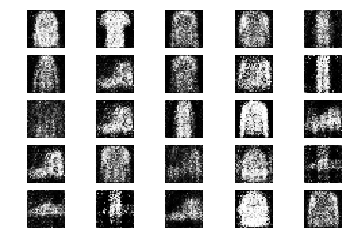

1551 [D loss: 0.632503, acc.: 54.69%] [G loss: 1.008039]
1552 [D loss: 0.576977, acc.: 67.19%] [G loss: 1.029924]
1553 [D loss: 0.617998, acc.: 64.06%] [G loss: 0.917837]
1554 [D loss: 0.606601, acc.: 71.88%] [G loss: 0.947310]
1555 [D loss: 0.572403, acc.: 75.00%] [G loss: 1.032042]
1556 [D loss: 0.588904, acc.: 75.00%] [G loss: 0.983902]
1557 [D loss: 0.572166, acc.: 73.44%] [G loss: 0.886978]
1558 [D loss: 0.607026, acc.: 60.94%] [G loss: 0.953672]
1559 [D loss: 0.633926, acc.: 56.25%] [G loss: 0.971522]
1560 [D loss: 0.558088, acc.: 76.56%] [G loss: 1.100971]
1561 [D loss: 0.588566, acc.: 75.00%] [G loss: 0.960395]
1562 [D loss: 0.578452, acc.: 70.31%] [G loss: 0.826302]
1563 [D loss: 0.736590, acc.: 57.81%] [G loss: 0.934281]
1564 [D loss: 0.683215, acc.: 60.94%] [G loss: 0.986541]
1565 [D loss: 0.614241, acc.: 65.62%] [G loss: 0.939989]
1566 [D loss: 0.541800, acc.: 76.56%] [G loss: 0.994783]
1567 [D loss: 0.613293, acc.: 73.44%] [G loss: 0.917975]
1568 [D loss: 0.514457, acc.: 8

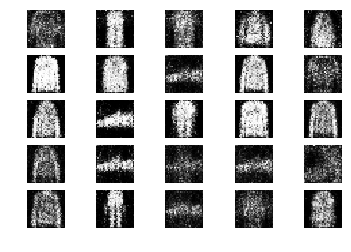

1601 [D loss: 0.576357, acc.: 75.00%] [G loss: 1.004354]
1602 [D loss: 0.626640, acc.: 65.62%] [G loss: 0.876084]
1603 [D loss: 0.585729, acc.: 68.75%] [G loss: 0.919978]
1604 [D loss: 0.686532, acc.: 59.38%] [G loss: 0.851382]
1605 [D loss: 0.654941, acc.: 62.50%] [G loss: 0.991428]
1606 [D loss: 0.547812, acc.: 84.38%] [G loss: 0.988231]
1607 [D loss: 0.620873, acc.: 60.94%] [G loss: 0.971914]
1608 [D loss: 0.568107, acc.: 76.56%] [G loss: 0.929518]
1609 [D loss: 0.684888, acc.: 62.50%] [G loss: 0.935532]
1610 [D loss: 0.606652, acc.: 68.75%] [G loss: 0.904755]
1611 [D loss: 0.537376, acc.: 76.56%] [G loss: 0.949715]
1612 [D loss: 0.577337, acc.: 68.75%] [G loss: 0.863943]
1613 [D loss: 0.601085, acc.: 68.75%] [G loss: 0.817574]
1614 [D loss: 0.617516, acc.: 65.62%] [G loss: 0.942994]
1615 [D loss: 0.618151, acc.: 71.88%] [G loss: 1.006536]
1616 [D loss: 0.572430, acc.: 68.75%] [G loss: 0.888857]
1617 [D loss: 0.552269, acc.: 79.69%] [G loss: 0.996601]
1618 [D loss: 0.613888, acc.: 6

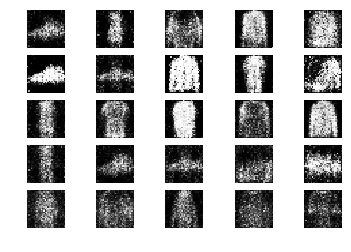

1651 [D loss: 0.633900, acc.: 71.88%] [G loss: 1.019157]
1652 [D loss: 0.598922, acc.: 70.31%] [G loss: 0.820010]
1653 [D loss: 0.593817, acc.: 68.75%] [G loss: 1.027563]
1654 [D loss: 0.625443, acc.: 64.06%] [G loss: 0.964039]
1655 [D loss: 0.617487, acc.: 67.19%] [G loss: 0.895544]
1656 [D loss: 0.598869, acc.: 67.19%] [G loss: 0.974218]
1657 [D loss: 0.589098, acc.: 70.31%] [G loss: 0.947269]
1658 [D loss: 0.609983, acc.: 64.06%] [G loss: 1.110698]
1659 [D loss: 0.625708, acc.: 68.75%] [G loss: 0.896236]
1660 [D loss: 0.592388, acc.: 67.19%] [G loss: 0.923670]
1661 [D loss: 0.571422, acc.: 73.44%] [G loss: 0.878814]
1662 [D loss: 0.541565, acc.: 76.56%] [G loss: 1.005620]
1663 [D loss: 0.668431, acc.: 60.94%] [G loss: 0.884337]
1664 [D loss: 0.558632, acc.: 78.12%] [G loss: 0.911396]
1665 [D loss: 0.531423, acc.: 78.12%] [G loss: 0.929660]
1666 [D loss: 0.549043, acc.: 70.31%] [G loss: 1.036686]
1667 [D loss: 0.526372, acc.: 71.88%] [G loss: 0.929242]
1668 [D loss: 0.626514, acc.: 6

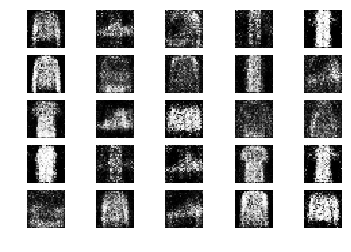

1701 [D loss: 0.660036, acc.: 57.81%] [G loss: 0.982013]
1702 [D loss: 0.597884, acc.: 71.88%] [G loss: 0.902271]
1703 [D loss: 0.601884, acc.: 70.31%] [G loss: 1.050828]
1704 [D loss: 0.669964, acc.: 54.69%] [G loss: 1.022132]
1705 [D loss: 0.587605, acc.: 75.00%] [G loss: 0.941412]
1706 [D loss: 0.593283, acc.: 75.00%] [G loss: 1.014427]
1707 [D loss: 0.577715, acc.: 75.00%] [G loss: 0.997589]
1708 [D loss: 0.560199, acc.: 68.75%] [G loss: 0.911599]
1709 [D loss: 0.627049, acc.: 64.06%] [G loss: 0.933327]
1710 [D loss: 0.609662, acc.: 67.19%] [G loss: 0.899323]
1711 [D loss: 0.590109, acc.: 68.75%] [G loss: 0.913380]
1712 [D loss: 0.586264, acc.: 75.00%] [G loss: 0.930502]
1713 [D loss: 0.611445, acc.: 65.62%] [G loss: 0.920454]
1714 [D loss: 0.601683, acc.: 67.19%] [G loss: 1.020306]
1715 [D loss: 0.587110, acc.: 68.75%] [G loss: 0.946472]
1716 [D loss: 0.707269, acc.: 51.56%] [G loss: 0.960275]
1717 [D loss: 0.568776, acc.: 67.19%] [G loss: 0.926244]
1718 [D loss: 0.561530, acc.: 7

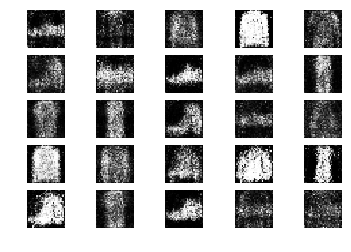

1751 [D loss: 0.569772, acc.: 71.88%] [G loss: 1.027277]
1752 [D loss: 0.597538, acc.: 68.75%] [G loss: 1.048742]
1753 [D loss: 0.634102, acc.: 64.06%] [G loss: 1.062631]
1754 [D loss: 0.562122, acc.: 70.31%] [G loss: 1.101814]
1755 [D loss: 0.715317, acc.: 56.25%] [G loss: 0.952452]
1756 [D loss: 0.587824, acc.: 68.75%] [G loss: 0.911902]
1757 [D loss: 0.600698, acc.: 68.75%] [G loss: 0.896446]
1758 [D loss: 0.631374, acc.: 65.62%] [G loss: 0.970703]
1759 [D loss: 0.537514, acc.: 75.00%] [G loss: 0.917002]
1760 [D loss: 0.632901, acc.: 64.06%] [G loss: 0.905860]
1761 [D loss: 0.599521, acc.: 67.19%] [G loss: 0.945342]
1762 [D loss: 0.543357, acc.: 75.00%] [G loss: 0.909774]
1763 [D loss: 0.655844, acc.: 62.50%] [G loss: 1.022274]
1764 [D loss: 0.546745, acc.: 73.44%] [G loss: 0.976954]
1765 [D loss: 0.606608, acc.: 60.94%] [G loss: 0.860515]
1766 [D loss: 0.665383, acc.: 60.94%] [G loss: 0.915312]
1767 [D loss: 0.635336, acc.: 64.06%] [G loss: 0.852790]
1768 [D loss: 0.600596, acc.: 6

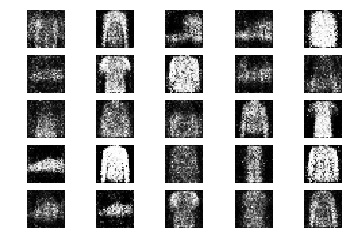

1801 [D loss: 0.686128, acc.: 59.38%] [G loss: 0.861545]
1802 [D loss: 0.549740, acc.: 70.31%] [G loss: 1.025908]
1803 [D loss: 0.618192, acc.: 62.50%] [G loss: 1.021592]
1804 [D loss: 0.569867, acc.: 75.00%] [G loss: 0.924646]
1805 [D loss: 0.588192, acc.: 73.44%] [G loss: 0.938154]
1806 [D loss: 0.614397, acc.: 64.06%] [G loss: 0.792250]
1807 [D loss: 0.530364, acc.: 71.88%] [G loss: 0.970119]
1808 [D loss: 0.519856, acc.: 79.69%] [G loss: 0.974507]
1809 [D loss: 0.606605, acc.: 62.50%] [G loss: 0.988569]
1810 [D loss: 0.565684, acc.: 73.44%] [G loss: 0.900992]
1811 [D loss: 0.590269, acc.: 67.19%] [G loss: 0.945238]
1812 [D loss: 0.520038, acc.: 78.12%] [G loss: 0.889907]
1813 [D loss: 0.630760, acc.: 57.81%] [G loss: 0.887730]
1814 [D loss: 0.533962, acc.: 75.00%] [G loss: 1.075493]
1815 [D loss: 0.535611, acc.: 76.56%] [G loss: 0.986117]
1816 [D loss: 0.590753, acc.: 73.44%] [G loss: 1.011036]
1817 [D loss: 0.558882, acc.: 71.88%] [G loss: 1.158231]
1818 [D loss: 0.671976, acc.: 5

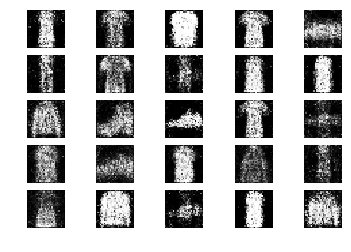

1851 [D loss: 0.592749, acc.: 67.19%] [G loss: 0.909717]
1852 [D loss: 0.612793, acc.: 60.94%] [G loss: 0.970668]
1853 [D loss: 0.604748, acc.: 67.19%] [G loss: 0.963441]
1854 [D loss: 0.571451, acc.: 71.88%] [G loss: 0.896135]
1855 [D loss: 0.576028, acc.: 62.50%] [G loss: 1.036954]
1856 [D loss: 0.627338, acc.: 73.44%] [G loss: 1.042044]
1857 [D loss: 0.625092, acc.: 68.75%] [G loss: 1.006151]
1858 [D loss: 0.602881, acc.: 65.62%] [G loss: 1.119751]
1859 [D loss: 0.589915, acc.: 68.75%] [G loss: 1.013833]
1860 [D loss: 0.642598, acc.: 67.19%] [G loss: 1.105297]
1861 [D loss: 0.615821, acc.: 62.50%] [G loss: 1.075081]
1862 [D loss: 0.565248, acc.: 73.44%] [G loss: 0.952690]
1863 [D loss: 0.574193, acc.: 65.62%] [G loss: 0.991534]
1864 [D loss: 0.535168, acc.: 79.69%] [G loss: 1.015059]
1865 [D loss: 0.621345, acc.: 67.19%] [G loss: 0.978358]
1866 [D loss: 0.555094, acc.: 75.00%] [G loss: 0.980467]
1867 [D loss: 0.669132, acc.: 60.94%] [G loss: 1.046919]
1868 [D loss: 0.577342, acc.: 7

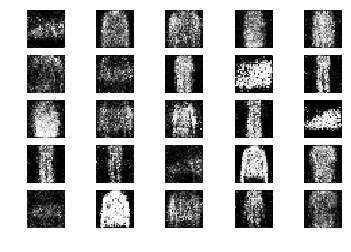

1901 [D loss: 0.677802, acc.: 54.69%] [G loss: 0.957473]
1902 [D loss: 0.567825, acc.: 76.56%] [G loss: 1.023728]
1903 [D loss: 0.625316, acc.: 64.06%] [G loss: 0.993199]
1904 [D loss: 0.653957, acc.: 62.50%] [G loss: 0.976535]
1905 [D loss: 0.644948, acc.: 60.94%] [G loss: 0.942278]
1906 [D loss: 0.628371, acc.: 60.94%] [G loss: 1.000037]
1907 [D loss: 0.615021, acc.: 68.75%] [G loss: 1.017067]
1908 [D loss: 0.663473, acc.: 57.81%] [G loss: 0.934019]
1909 [D loss: 0.625110, acc.: 67.19%] [G loss: 0.919629]
1910 [D loss: 0.616057, acc.: 67.19%] [G loss: 1.063071]
1911 [D loss: 0.700093, acc.: 56.25%] [G loss: 0.865391]
1912 [D loss: 0.647534, acc.: 59.38%] [G loss: 0.899493]
1913 [D loss: 0.625564, acc.: 67.19%] [G loss: 1.006034]
1914 [D loss: 0.611765, acc.: 70.31%] [G loss: 0.989152]
1915 [D loss: 0.579499, acc.: 57.81%] [G loss: 1.099267]
1916 [D loss: 0.590667, acc.: 67.19%] [G loss: 1.011807]
1917 [D loss: 0.672976, acc.: 57.81%] [G loss: 1.001788]
1918 [D loss: 0.642423, acc.: 6

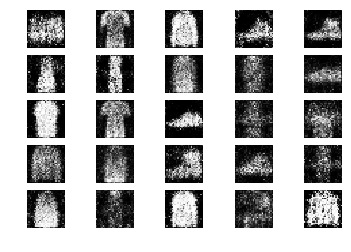

1951 [D loss: 0.664086, acc.: 59.38%] [G loss: 0.984034]
1952 [D loss: 0.642130, acc.: 64.06%] [G loss: 0.967107]
1953 [D loss: 0.588502, acc.: 70.31%] [G loss: 1.019462]
1954 [D loss: 0.587130, acc.: 79.69%] [G loss: 0.940989]
1955 [D loss: 0.582134, acc.: 71.88%] [G loss: 0.958354]
1956 [D loss: 0.583648, acc.: 70.31%] [G loss: 0.943393]
1957 [D loss: 0.629368, acc.: 56.25%] [G loss: 0.978991]
1958 [D loss: 0.620273, acc.: 57.81%] [G loss: 0.916724]
1959 [D loss: 0.647828, acc.: 57.81%] [G loss: 0.951978]
1960 [D loss: 0.645993, acc.: 64.06%] [G loss: 0.911675]
1961 [D loss: 0.589967, acc.: 70.31%] [G loss: 1.001728]
1962 [D loss: 0.644837, acc.: 64.06%] [G loss: 1.010610]
1963 [D loss: 0.621173, acc.: 65.62%] [G loss: 0.956347]
1964 [D loss: 0.591339, acc.: 70.31%] [G loss: 1.025417]
1965 [D loss: 0.610001, acc.: 62.50%] [G loss: 0.936831]
1966 [D loss: 0.579980, acc.: 70.31%] [G loss: 1.009413]
1967 [D loss: 0.642273, acc.: 67.19%] [G loss: 0.951805]
1968 [D loss: 0.660803, acc.: 5

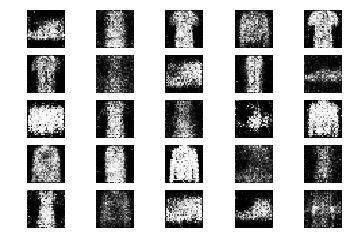

2001 [D loss: 0.577069, acc.: 65.62%] [G loss: 1.029798]
2002 [D loss: 0.603357, acc.: 70.31%] [G loss: 1.009261]
2003 [D loss: 0.651686, acc.: 57.81%] [G loss: 0.948533]
2004 [D loss: 0.579297, acc.: 67.19%] [G loss: 0.982046]
2005 [D loss: 0.548253, acc.: 73.44%] [G loss: 0.924957]
2006 [D loss: 0.628353, acc.: 62.50%] [G loss: 0.962660]
2007 [D loss: 0.524141, acc.: 78.12%] [G loss: 0.965750]
2008 [D loss: 0.605073, acc.: 64.06%] [G loss: 1.080266]
2009 [D loss: 0.596740, acc.: 65.62%] [G loss: 0.994402]
2010 [D loss: 0.561049, acc.: 75.00%] [G loss: 0.949547]
2011 [D loss: 0.554034, acc.: 71.88%] [G loss: 1.039920]
2012 [D loss: 0.654023, acc.: 62.50%] [G loss: 0.974750]
2013 [D loss: 0.639824, acc.: 60.94%] [G loss: 1.104891]
2014 [D loss: 0.603248, acc.: 70.31%] [G loss: 0.989111]
2015 [D loss: 0.501913, acc.: 78.12%] [G loss: 0.981113]
2016 [D loss: 0.609450, acc.: 62.50%] [G loss: 1.078660]
2017 [D loss: 0.516510, acc.: 82.81%] [G loss: 1.033675]
2018 [D loss: 0.626694, acc.: 6

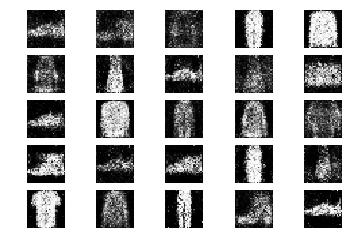

2051 [D loss: 0.594543, acc.: 71.88%] [G loss: 0.865799]
2052 [D loss: 0.586076, acc.: 67.19%] [G loss: 0.891436]
2053 [D loss: 0.590278, acc.: 73.44%] [G loss: 0.956791]
2054 [D loss: 0.654103, acc.: 57.81%] [G loss: 0.931355]
2055 [D loss: 0.720527, acc.: 45.31%] [G loss: 0.991065]
2056 [D loss: 0.614743, acc.: 71.88%] [G loss: 0.942489]
2057 [D loss: 0.635484, acc.: 60.94%] [G loss: 0.937453]
2058 [D loss: 0.554895, acc.: 71.88%] [G loss: 0.975580]
2059 [D loss: 0.640140, acc.: 62.50%] [G loss: 1.046882]
2060 [D loss: 0.593861, acc.: 65.62%] [G loss: 1.066046]
2061 [D loss: 0.650504, acc.: 60.94%] [G loss: 0.927720]
2062 [D loss: 0.645435, acc.: 57.81%] [G loss: 0.998524]
2063 [D loss: 0.677092, acc.: 62.50%] [G loss: 0.994378]
2064 [D loss: 0.621919, acc.: 67.19%] [G loss: 0.937698]
2065 [D loss: 0.565684, acc.: 70.31%] [G loss: 0.917254]
2066 [D loss: 0.559092, acc.: 68.75%] [G loss: 1.023862]
2067 [D loss: 0.633485, acc.: 64.06%] [G loss: 0.951289]
2068 [D loss: 0.588031, acc.: 6

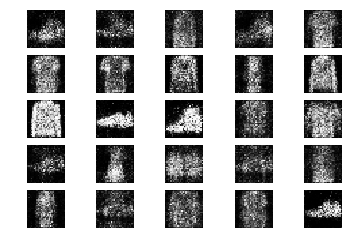

2101 [D loss: 0.649288, acc.: 59.38%] [G loss: 0.949909]
2102 [D loss: 0.647828, acc.: 57.81%] [G loss: 1.010125]
2103 [D loss: 0.576824, acc.: 70.31%] [G loss: 0.981361]
2104 [D loss: 0.602935, acc.: 62.50%] [G loss: 0.990836]
2105 [D loss: 0.720467, acc.: 45.31%] [G loss: 0.941216]
2106 [D loss: 0.587441, acc.: 67.19%] [G loss: 0.809298]
2107 [D loss: 0.574116, acc.: 78.12%] [G loss: 0.958055]
2108 [D loss: 0.614735, acc.: 71.88%] [G loss: 0.914440]
2109 [D loss: 0.562423, acc.: 68.75%] [G loss: 0.891115]
2110 [D loss: 0.602496, acc.: 65.62%] [G loss: 1.000252]
2111 [D loss: 0.604164, acc.: 62.50%] [G loss: 1.029420]
2112 [D loss: 0.697069, acc.: 59.38%] [G loss: 0.946132]
2113 [D loss: 0.619457, acc.: 65.62%] [G loss: 1.016671]
2114 [D loss: 0.607959, acc.: 64.06%] [G loss: 0.994117]
2115 [D loss: 0.612221, acc.: 76.56%] [G loss: 0.961557]
2116 [D loss: 0.614700, acc.: 70.31%] [G loss: 0.895942]
2117 [D loss: 0.560835, acc.: 68.75%] [G loss: 0.833441]
2118 [D loss: 0.577213, acc.: 6

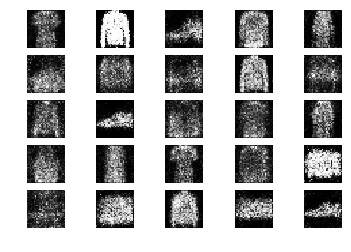

2151 [D loss: 0.573199, acc.: 71.88%] [G loss: 0.955127]
2152 [D loss: 0.673047, acc.: 62.50%] [G loss: 1.018461]
2153 [D loss: 0.621636, acc.: 64.06%] [G loss: 0.990586]
2154 [D loss: 0.619601, acc.: 59.38%] [G loss: 0.906069]
2155 [D loss: 0.583863, acc.: 75.00%] [G loss: 0.920139]
2156 [D loss: 0.578030, acc.: 70.31%] [G loss: 0.807124]
2157 [D loss: 0.597549, acc.: 59.38%] [G loss: 0.868707]
2158 [D loss: 0.625761, acc.: 62.50%] [G loss: 0.874402]
2159 [D loss: 0.555323, acc.: 75.00%] [G loss: 0.957854]
2160 [D loss: 0.688954, acc.: 57.81%] [G loss: 1.022690]
2161 [D loss: 0.665023, acc.: 59.38%] [G loss: 1.011839]
2162 [D loss: 0.653108, acc.: 60.94%] [G loss: 1.037718]
2163 [D loss: 0.511517, acc.: 81.25%] [G loss: 1.028652]
2164 [D loss: 0.592192, acc.: 64.06%] [G loss: 1.087146]
2165 [D loss: 0.657208, acc.: 59.38%] [G loss: 0.902669]
2166 [D loss: 0.551430, acc.: 78.12%] [G loss: 0.894334]
2167 [D loss: 0.608316, acc.: 68.75%] [G loss: 0.866299]
2168 [D loss: 0.539918, acc.: 7

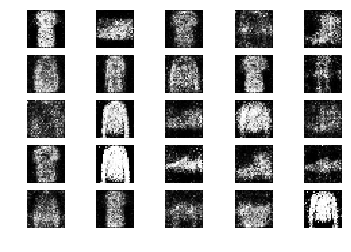

2201 [D loss: 0.716380, acc.: 56.25%] [G loss: 1.017347]
2202 [D loss: 0.543147, acc.: 76.56%] [G loss: 0.994761]
2203 [D loss: 0.604450, acc.: 70.31%] [G loss: 0.935041]
2204 [D loss: 0.683604, acc.: 54.69%] [G loss: 0.985718]
2205 [D loss: 0.565066, acc.: 73.44%] [G loss: 0.942154]
2206 [D loss: 0.635737, acc.: 64.06%] [G loss: 0.988035]
2207 [D loss: 0.586349, acc.: 67.19%] [G loss: 1.058084]
2208 [D loss: 0.532111, acc.: 76.56%] [G loss: 0.968618]
2209 [D loss: 0.585129, acc.: 67.19%] [G loss: 1.080740]
2210 [D loss: 0.674292, acc.: 56.25%] [G loss: 0.940743]
2211 [D loss: 0.618484, acc.: 59.38%] [G loss: 0.984226]
2212 [D loss: 0.606332, acc.: 70.31%] [G loss: 0.984873]
2213 [D loss: 0.686588, acc.: 59.38%] [G loss: 1.087475]
2214 [D loss: 0.632875, acc.: 68.75%] [G loss: 1.043749]
2215 [D loss: 0.582714, acc.: 67.19%] [G loss: 1.015179]
2216 [D loss: 0.611203, acc.: 70.31%] [G loss: 1.170714]
2217 [D loss: 0.614037, acc.: 64.06%] [G loss: 1.043785]
2218 [D loss: 0.610558, acc.: 6

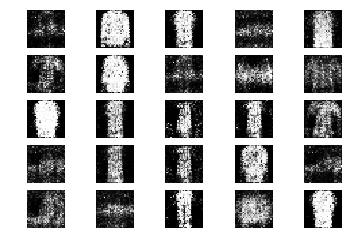

2251 [D loss: 0.637966, acc.: 62.50%] [G loss: 1.070330]
2252 [D loss: 0.633045, acc.: 62.50%] [G loss: 0.993840]
2253 [D loss: 0.587203, acc.: 70.31%] [G loss: 0.907585]
2254 [D loss: 0.626201, acc.: 62.50%] [G loss: 0.979835]
2255 [D loss: 0.584848, acc.: 67.19%] [G loss: 0.973579]
2256 [D loss: 0.597483, acc.: 73.44%] [G loss: 1.031828]
2257 [D loss: 0.560007, acc.: 73.44%] [G loss: 1.022720]
2258 [D loss: 0.617525, acc.: 70.31%] [G loss: 0.915894]
2259 [D loss: 0.589735, acc.: 65.62%] [G loss: 0.957337]
2260 [D loss: 0.628799, acc.: 60.94%] [G loss: 0.922160]
2261 [D loss: 0.600313, acc.: 65.62%] [G loss: 0.908442]
2262 [D loss: 0.597827, acc.: 68.75%] [G loss: 0.886026]
2263 [D loss: 0.605202, acc.: 70.31%] [G loss: 0.928110]
2264 [D loss: 0.558710, acc.: 78.12%] [G loss: 1.018837]
2265 [D loss: 0.581156, acc.: 70.31%] [G loss: 1.032634]
2266 [D loss: 0.600846, acc.: 67.19%] [G loss: 0.982949]
2267 [D loss: 0.631055, acc.: 60.94%] [G loss: 1.085376]
2268 [D loss: 0.544578, acc.: 8

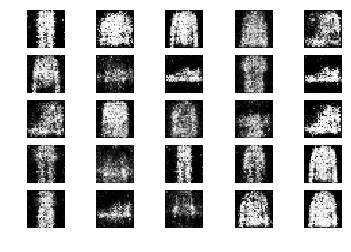

2301 [D loss: 0.622911, acc.: 65.62%] [G loss: 0.929192]
2302 [D loss: 0.660631, acc.: 67.19%] [G loss: 0.978744]
2303 [D loss: 0.585536, acc.: 65.62%] [G loss: 0.877351]
2304 [D loss: 0.539294, acc.: 75.00%] [G loss: 1.034532]
2305 [D loss: 0.676717, acc.: 59.38%] [G loss: 1.088537]
2306 [D loss: 0.598613, acc.: 67.19%] [G loss: 1.087026]
2307 [D loss: 0.600504, acc.: 60.94%] [G loss: 1.069527]
2308 [D loss: 0.624094, acc.: 68.75%] [G loss: 0.958617]
2309 [D loss: 0.669749, acc.: 60.94%] [G loss: 0.994238]
2310 [D loss: 0.624149, acc.: 65.62%] [G loss: 1.092479]
2311 [D loss: 0.655322, acc.: 56.25%] [G loss: 1.038100]
2312 [D loss: 0.591455, acc.: 59.38%] [G loss: 1.035113]
2313 [D loss: 0.552814, acc.: 76.56%] [G loss: 1.162458]
2314 [D loss: 0.631366, acc.: 65.62%] [G loss: 1.072655]
2315 [D loss: 0.671118, acc.: 62.50%] [G loss: 1.052362]
2316 [D loss: 0.570699, acc.: 73.44%] [G loss: 1.025021]
2317 [D loss: 0.629817, acc.: 65.62%] [G loss: 1.022709]
2318 [D loss: 0.550286, acc.: 7

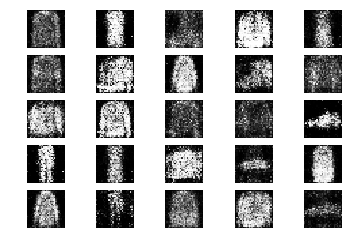

2351 [D loss: 0.666060, acc.: 62.50%] [G loss: 1.087250]
2352 [D loss: 0.544910, acc.: 68.75%] [G loss: 1.081355]
2353 [D loss: 0.619762, acc.: 62.50%] [G loss: 1.076338]
2354 [D loss: 0.576308, acc.: 65.62%] [G loss: 1.009291]
2355 [D loss: 0.675805, acc.: 54.69%] [G loss: 0.923879]
2356 [D loss: 0.583929, acc.: 73.44%] [G loss: 1.009312]
2357 [D loss: 0.657125, acc.: 68.75%] [G loss: 1.001127]
2358 [D loss: 0.645657, acc.: 62.50%] [G loss: 0.975749]
2359 [D loss: 0.495068, acc.: 75.00%] [G loss: 1.075475]
2360 [D loss: 0.591463, acc.: 64.06%] [G loss: 1.057799]
2361 [D loss: 0.597291, acc.: 73.44%] [G loss: 1.132565]
2362 [D loss: 0.653617, acc.: 57.81%] [G loss: 1.041709]
2363 [D loss: 0.594651, acc.: 71.88%] [G loss: 0.991949]
2364 [D loss: 0.693608, acc.: 54.69%] [G loss: 1.061466]
2365 [D loss: 0.557283, acc.: 75.00%] [G loss: 1.183673]
2366 [D loss: 0.653822, acc.: 57.81%] [G loss: 0.967184]
2367 [D loss: 0.526474, acc.: 78.12%] [G loss: 1.092660]
2368 [D loss: 0.558113, acc.: 7

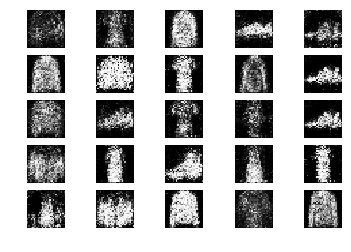

2401 [D loss: 0.625060, acc.: 64.06%] [G loss: 0.956374]
2402 [D loss: 0.566337, acc.: 73.44%] [G loss: 0.948120]
2403 [D loss: 0.663940, acc.: 62.50%] [G loss: 0.936479]
2404 [D loss: 0.590225, acc.: 67.19%] [G loss: 1.007663]
2405 [D loss: 0.590134, acc.: 67.19%] [G loss: 1.006131]
2406 [D loss: 0.550804, acc.: 70.31%] [G loss: 1.159772]
2407 [D loss: 0.610758, acc.: 67.19%] [G loss: 0.996295]
2408 [D loss: 0.638297, acc.: 56.25%] [G loss: 1.046130]
2409 [D loss: 0.597994, acc.: 60.94%] [G loss: 1.094191]
2410 [D loss: 0.595856, acc.: 70.31%] [G loss: 1.025548]
2411 [D loss: 0.723480, acc.: 54.69%] [G loss: 0.937420]
2412 [D loss: 0.660899, acc.: 67.19%] [G loss: 1.160860]
2413 [D loss: 0.687490, acc.: 59.38%] [G loss: 0.985430]
2414 [D loss: 0.585424, acc.: 76.56%] [G loss: 1.020033]
2415 [D loss: 0.649487, acc.: 62.50%] [G loss: 0.986102]
2416 [D loss: 0.557647, acc.: 73.44%] [G loss: 1.108120]
2417 [D loss: 0.524585, acc.: 81.25%] [G loss: 1.183445]
2418 [D loss: 0.617094, acc.: 6

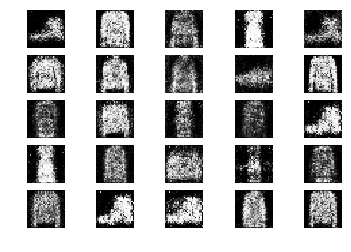

2451 [D loss: 0.575388, acc.: 68.75%] [G loss: 1.026835]
2452 [D loss: 0.583243, acc.: 71.88%] [G loss: 1.031331]
2453 [D loss: 0.637879, acc.: 62.50%] [G loss: 1.097862]
2454 [D loss: 0.565508, acc.: 71.88%] [G loss: 1.187895]
2455 [D loss: 0.634697, acc.: 64.06%] [G loss: 1.130601]
2456 [D loss: 0.615253, acc.: 67.19%] [G loss: 1.004051]
2457 [D loss: 0.575745, acc.: 71.88%] [G loss: 0.952987]
2458 [D loss: 0.666628, acc.: 59.38%] [G loss: 0.981339]
2459 [D loss: 0.673038, acc.: 59.38%] [G loss: 1.067621]
2460 [D loss: 0.716809, acc.: 60.94%] [G loss: 1.106772]
2461 [D loss: 0.630685, acc.: 60.94%] [G loss: 1.079123]
2462 [D loss: 0.608502, acc.: 67.19%] [G loss: 0.941189]
2463 [D loss: 0.567199, acc.: 70.31%] [G loss: 0.969025]
2464 [D loss: 0.628832, acc.: 67.19%] [G loss: 0.943783]
2465 [D loss: 0.567930, acc.: 67.19%] [G loss: 0.980315]
2466 [D loss: 0.533324, acc.: 76.56%] [G loss: 0.956472]
2467 [D loss: 0.594555, acc.: 67.19%] [G loss: 0.904394]
2468 [D loss: 0.595030, acc.: 6

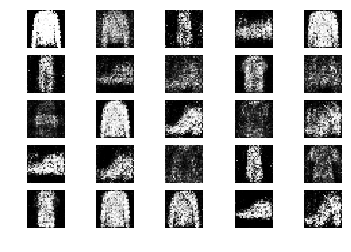

2501 [D loss: 0.675001, acc.: 56.25%] [G loss: 0.991476]
2502 [D loss: 0.603533, acc.: 64.06%] [G loss: 1.019743]
2503 [D loss: 0.566186, acc.: 71.88%] [G loss: 0.974275]
2504 [D loss: 0.599828, acc.: 68.75%] [G loss: 1.151838]
2505 [D loss: 0.575404, acc.: 67.19%] [G loss: 1.032652]
2506 [D loss: 0.572699, acc.: 67.19%] [G loss: 1.093605]
2507 [D loss: 0.540523, acc.: 75.00%] [G loss: 0.994430]
2508 [D loss: 0.654443, acc.: 64.06%] [G loss: 1.039111]
2509 [D loss: 0.671049, acc.: 46.88%] [G loss: 1.131197]
2510 [D loss: 0.569197, acc.: 70.31%] [G loss: 1.017666]
2511 [D loss: 0.686905, acc.: 64.06%] [G loss: 1.019426]
2512 [D loss: 0.560612, acc.: 71.88%] [G loss: 1.034617]
2513 [D loss: 0.628001, acc.: 65.62%] [G loss: 1.124199]
2514 [D loss: 0.561921, acc.: 67.19%] [G loss: 1.005689]
2515 [D loss: 0.632602, acc.: 57.81%] [G loss: 0.957534]
2516 [D loss: 0.548874, acc.: 70.31%] [G loss: 0.967398]
2517 [D loss: 0.550155, acc.: 76.56%] [G loss: 0.979174]
2518 [D loss: 0.608719, acc.: 6

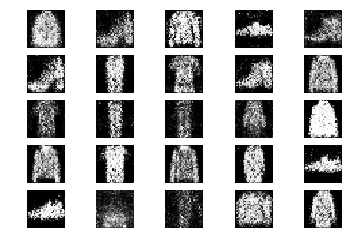

2551 [D loss: 0.509864, acc.: 78.12%] [G loss: 1.091060]
2552 [D loss: 0.659550, acc.: 62.50%] [G loss: 1.145823]
2553 [D loss: 0.591175, acc.: 62.50%] [G loss: 1.037180]
2554 [D loss: 0.623152, acc.: 57.81%] [G loss: 1.127850]
2555 [D loss: 0.603643, acc.: 68.75%] [G loss: 0.959711]
2556 [D loss: 0.558653, acc.: 68.75%] [G loss: 1.083747]
2557 [D loss: 0.560413, acc.: 73.44%] [G loss: 1.080703]
2558 [D loss: 0.553434, acc.: 73.44%] [G loss: 0.938808]
2559 [D loss: 0.587482, acc.: 73.44%] [G loss: 0.946889]
2560 [D loss: 0.667749, acc.: 57.81%] [G loss: 0.882079]
2561 [D loss: 0.543883, acc.: 68.75%] [G loss: 1.001304]
2562 [D loss: 0.522867, acc.: 78.12%] [G loss: 1.082456]
2563 [D loss: 0.581377, acc.: 76.56%] [G loss: 0.930061]
2564 [D loss: 0.623042, acc.: 62.50%] [G loss: 1.036215]
2565 [D loss: 0.529640, acc.: 71.88%] [G loss: 1.048955]
2566 [D loss: 0.656348, acc.: 70.31%] [G loss: 0.827941]
2567 [D loss: 0.583139, acc.: 62.50%] [G loss: 1.151111]
2568 [D loss: 0.565975, acc.: 7

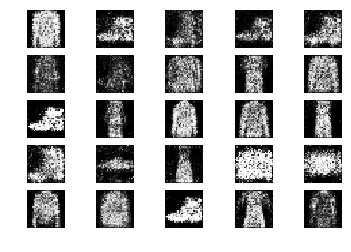

2601 [D loss: 0.570588, acc.: 64.06%] [G loss: 0.983295]
2602 [D loss: 0.700868, acc.: 51.56%] [G loss: 1.018613]
2603 [D loss: 0.590216, acc.: 65.62%] [G loss: 1.053453]
2604 [D loss: 0.577263, acc.: 67.19%] [G loss: 1.075324]
2605 [D loss: 0.628407, acc.: 64.06%] [G loss: 0.965923]
2606 [D loss: 0.538792, acc.: 78.12%] [G loss: 0.987695]
2607 [D loss: 0.627270, acc.: 70.31%] [G loss: 0.963222]
2608 [D loss: 0.585853, acc.: 71.88%] [G loss: 0.943463]
2609 [D loss: 0.665328, acc.: 59.38%] [G loss: 0.881430]
2610 [D loss: 0.577149, acc.: 67.19%] [G loss: 1.089618]
2611 [D loss: 0.652025, acc.: 56.25%] [G loss: 0.922399]
2612 [D loss: 0.608070, acc.: 65.62%] [G loss: 0.929090]
2613 [D loss: 0.642304, acc.: 56.25%] [G loss: 0.926344]
2614 [D loss: 0.589467, acc.: 65.62%] [G loss: 0.854166]
2615 [D loss: 0.654220, acc.: 62.50%] [G loss: 0.981188]
2616 [D loss: 0.610851, acc.: 60.94%] [G loss: 1.084586]
2617 [D loss: 0.586285, acc.: 71.88%] [G loss: 1.092611]
2618 [D loss: 0.693071, acc.: 4

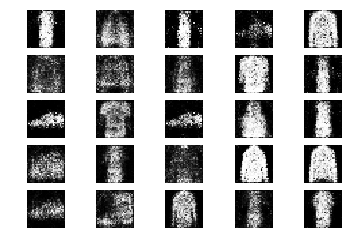

2651 [D loss: 0.566350, acc.: 65.62%] [G loss: 0.994925]
2652 [D loss: 0.554280, acc.: 81.25%] [G loss: 0.947255]
2653 [D loss: 0.587166, acc.: 71.88%] [G loss: 0.922169]
2654 [D loss: 0.536208, acc.: 75.00%] [G loss: 0.927468]
2655 [D loss: 0.620839, acc.: 62.50%] [G loss: 0.835087]
2656 [D loss: 0.638791, acc.: 59.38%] [G loss: 0.971762]
2657 [D loss: 0.584699, acc.: 68.75%] [G loss: 1.047568]
2658 [D loss: 0.636365, acc.: 64.06%] [G loss: 0.995956]
2659 [D loss: 0.595031, acc.: 71.88%] [G loss: 0.956397]
2660 [D loss: 0.559349, acc.: 73.44%] [G loss: 1.101510]
2661 [D loss: 0.547156, acc.: 71.88%] [G loss: 1.159810]
2662 [D loss: 0.591456, acc.: 71.88%] [G loss: 0.948590]
2663 [D loss: 0.588032, acc.: 70.31%] [G loss: 1.063093]
2664 [D loss: 0.661959, acc.: 60.94%] [G loss: 0.945103]
2665 [D loss: 0.626467, acc.: 60.94%] [G loss: 1.039093]
2666 [D loss: 0.594840, acc.: 62.50%] [G loss: 1.109575]
2667 [D loss: 0.563246, acc.: 71.88%] [G loss: 0.976071]
2668 [D loss: 0.565338, acc.: 7

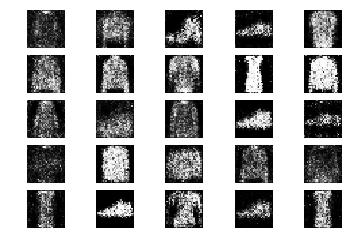

2701 [D loss: 0.628476, acc.: 64.06%] [G loss: 1.077553]
2702 [D loss: 0.550421, acc.: 68.75%] [G loss: 1.112536]
2703 [D loss: 0.590635, acc.: 71.88%] [G loss: 1.022975]
2704 [D loss: 0.691780, acc.: 53.12%] [G loss: 1.017410]
2705 [D loss: 0.627964, acc.: 62.50%] [G loss: 0.993803]
2706 [D loss: 0.603174, acc.: 64.06%] [G loss: 1.083691]
2707 [D loss: 0.590034, acc.: 70.31%] [G loss: 1.053964]
2708 [D loss: 0.648098, acc.: 54.69%] [G loss: 1.047484]
2709 [D loss: 0.738819, acc.: 48.44%] [G loss: 0.986437]
2710 [D loss: 0.611411, acc.: 73.44%] [G loss: 1.034013]
2711 [D loss: 0.802476, acc.: 46.88%] [G loss: 0.891099]
2712 [D loss: 0.708235, acc.: 57.81%] [G loss: 0.862424]
2713 [D loss: 0.628660, acc.: 64.06%] [G loss: 0.959490]
2714 [D loss: 0.596503, acc.: 68.75%] [G loss: 1.055539]
2715 [D loss: 0.690407, acc.: 54.69%] [G loss: 0.920692]
2716 [D loss: 0.696128, acc.: 53.12%] [G loss: 0.980971]
2717 [D loss: 0.643643, acc.: 59.38%] [G loss: 0.938429]
2718 [D loss: 0.613527, acc.: 7

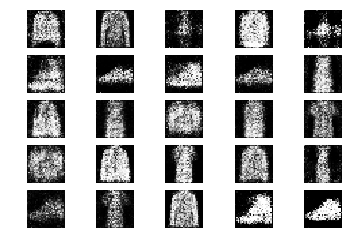

2751 [D loss: 0.654666, acc.: 57.81%] [G loss: 0.972132]
2752 [D loss: 0.561233, acc.: 65.62%] [G loss: 1.086276]
2753 [D loss: 0.619902, acc.: 65.62%] [G loss: 0.874200]
2754 [D loss: 0.621255, acc.: 67.19%] [G loss: 0.983297]
2755 [D loss: 0.544057, acc.: 73.44%] [G loss: 0.927690]
2756 [D loss: 0.586881, acc.: 71.88%] [G loss: 0.821629]
2757 [D loss: 0.594172, acc.: 68.75%] [G loss: 0.963814]
2758 [D loss: 0.616986, acc.: 65.62%] [G loss: 0.994066]
2759 [D loss: 0.686839, acc.: 53.12%] [G loss: 1.008821]
2760 [D loss: 0.629001, acc.: 68.75%] [G loss: 0.988273]
2761 [D loss: 0.707991, acc.: 51.56%] [G loss: 0.983076]
2762 [D loss: 0.653747, acc.: 64.06%] [G loss: 0.929604]
2763 [D loss: 0.538733, acc.: 75.00%] [G loss: 1.047358]
2764 [D loss: 0.673632, acc.: 64.06%] [G loss: 1.267047]
2765 [D loss: 0.586230, acc.: 64.06%] [G loss: 1.046433]
2766 [D loss: 0.686462, acc.: 60.94%] [G loss: 0.990207]
2767 [D loss: 0.612445, acc.: 65.62%] [G loss: 0.875102]
2768 [D loss: 0.594954, acc.: 7

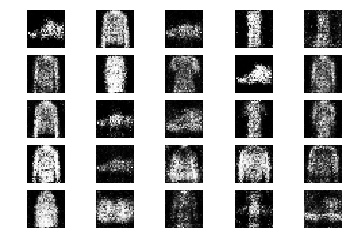

2801 [D loss: 0.629077, acc.: 59.38%] [G loss: 1.036327]
2802 [D loss: 0.606784, acc.: 68.75%] [G loss: 0.948794]
2803 [D loss: 0.672702, acc.: 56.25%] [G loss: 0.903686]
2804 [D loss: 0.548764, acc.: 73.44%] [G loss: 1.024294]
2805 [D loss: 0.629438, acc.: 64.06%] [G loss: 0.995359]
2806 [D loss: 0.622617, acc.: 67.19%] [G loss: 1.104598]
2807 [D loss: 0.648578, acc.: 53.12%] [G loss: 0.922431]
2808 [D loss: 0.577320, acc.: 70.31%] [G loss: 0.961781]
2809 [D loss: 0.640127, acc.: 65.62%] [G loss: 1.020338]
2810 [D loss: 0.615947, acc.: 64.06%] [G loss: 0.943457]
2811 [D loss: 0.601441, acc.: 71.88%] [G loss: 0.878533]
2812 [D loss: 0.636872, acc.: 62.50%] [G loss: 0.998177]
2813 [D loss: 0.606390, acc.: 65.62%] [G loss: 1.018080]
2814 [D loss: 0.602544, acc.: 64.06%] [G loss: 0.999428]
2815 [D loss: 0.621820, acc.: 60.94%] [G loss: 0.967735]
2816 [D loss: 0.596998, acc.: 71.88%] [G loss: 0.979323]
2817 [D loss: 0.579740, acc.: 62.50%] [G loss: 0.993704]
2818 [D loss: 0.640599, acc.: 6

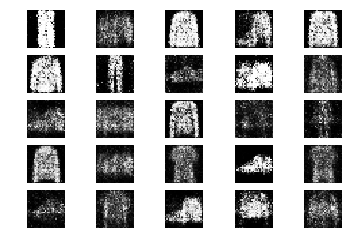

2851 [D loss: 0.558740, acc.: 73.44%] [G loss: 1.003665]
2852 [D loss: 0.691973, acc.: 54.69%] [G loss: 0.980741]
2853 [D loss: 0.584478, acc.: 65.62%] [G loss: 0.943579]
2854 [D loss: 0.544634, acc.: 73.44%] [G loss: 1.024138]
2855 [D loss: 0.560670, acc.: 73.44%] [G loss: 0.987387]
2856 [D loss: 0.597041, acc.: 65.62%] [G loss: 0.955379]
2857 [D loss: 0.553574, acc.: 71.88%] [G loss: 0.943504]
2858 [D loss: 0.561949, acc.: 75.00%] [G loss: 1.005822]
2859 [D loss: 0.616998, acc.: 68.75%] [G loss: 1.038093]
2860 [D loss: 0.594001, acc.: 65.62%] [G loss: 0.942882]
2861 [D loss: 0.656225, acc.: 62.50%] [G loss: 0.903839]
2862 [D loss: 0.565890, acc.: 75.00%] [G loss: 0.950046]
2863 [D loss: 0.606651, acc.: 62.50%] [G loss: 0.849405]
2864 [D loss: 0.562913, acc.: 70.31%] [G loss: 0.907882]
2865 [D loss: 0.558384, acc.: 68.75%] [G loss: 0.993196]
2866 [D loss: 0.585189, acc.: 67.19%] [G loss: 0.959316]
2867 [D loss: 0.649912, acc.: 64.06%] [G loss: 0.953840]
2868 [D loss: 0.687124, acc.: 5

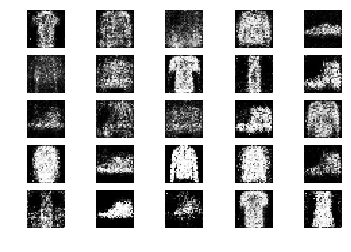

2901 [D loss: 0.653986, acc.: 51.56%] [G loss: 1.075769]
2902 [D loss: 0.628473, acc.: 59.38%] [G loss: 1.070352]
2903 [D loss: 0.593552, acc.: 67.19%] [G loss: 1.069645]
2904 [D loss: 0.651483, acc.: 62.50%] [G loss: 0.960393]
2905 [D loss: 0.597883, acc.: 68.75%] [G loss: 0.965830]
2906 [D loss: 0.615496, acc.: 67.19%] [G loss: 0.987459]
2907 [D loss: 0.551127, acc.: 75.00%] [G loss: 0.982559]
2908 [D loss: 0.709913, acc.: 56.25%] [G loss: 0.931345]
2909 [D loss: 0.586519, acc.: 73.44%] [G loss: 0.928219]
2910 [D loss: 0.598334, acc.: 60.94%] [G loss: 0.928127]
2911 [D loss: 0.594173, acc.: 64.06%] [G loss: 1.015937]
2912 [D loss: 0.605440, acc.: 68.75%] [G loss: 1.097927]
2913 [D loss: 0.575909, acc.: 70.31%] [G loss: 1.061107]
2914 [D loss: 0.569089, acc.: 67.19%] [G loss: 1.035000]
2915 [D loss: 0.567940, acc.: 73.44%] [G loss: 0.960474]
2916 [D loss: 0.619548, acc.: 67.19%] [G loss: 0.999261]
2917 [D loss: 0.585964, acc.: 67.19%] [G loss: 0.978891]
2918 [D loss: 0.599843, acc.: 6

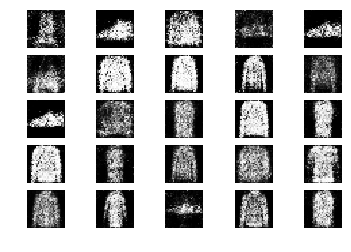

2951 [D loss: 0.616343, acc.: 68.75%] [G loss: 1.007143]
2952 [D loss: 0.643508, acc.: 67.19%] [G loss: 0.966104]
2953 [D loss: 0.630335, acc.: 56.25%] [G loss: 1.026414]
2954 [D loss: 0.600468, acc.: 70.31%] [G loss: 0.937881]
2955 [D loss: 0.624995, acc.: 64.06%] [G loss: 0.928327]
2956 [D loss: 0.560834, acc.: 65.62%] [G loss: 0.991609]
2957 [D loss: 0.580537, acc.: 70.31%] [G loss: 1.082211]
2958 [D loss: 0.580921, acc.: 64.06%] [G loss: 0.999382]
2959 [D loss: 0.666868, acc.: 60.94%] [G loss: 0.967467]
2960 [D loss: 0.578056, acc.: 71.88%] [G loss: 0.971176]
2961 [D loss: 0.623199, acc.: 65.62%] [G loss: 0.910216]
2962 [D loss: 0.615647, acc.: 65.62%] [G loss: 0.915517]
2963 [D loss: 0.615141, acc.: 64.06%] [G loss: 0.964905]
2964 [D loss: 0.637427, acc.: 65.62%] [G loss: 0.944120]
2965 [D loss: 0.667009, acc.: 60.94%] [G loss: 1.028360]
2966 [D loss: 0.638192, acc.: 64.06%] [G loss: 0.931019]
2967 [D loss: 0.638804, acc.: 59.38%] [G loss: 0.981852]
2968 [D loss: 0.556971, acc.: 7

In [13]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

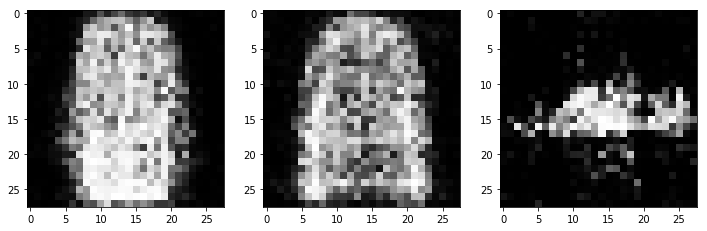

In [14]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()